## Nosakhare Edokpayi | S4214240

### CT7205: MACHINE LEARNING AND OPTIMISATION

### QUESTION 2: CENSUS DATA

In [1]:
# Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing tools
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Machine learning models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Metrics and model evaluation
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, classification_report, confusion_matrix
)

# Utilities for model training and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

# Clustering and dimensionality reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Deep learning with TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


## DATA IMPORTATION AND EXPLORATION

In [2]:
df = pd.read_csv('CensusDB.csv')

In [3]:
# view the first five rows of the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


In [4]:
# view the last five rows of the dataset
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


In [5]:
# view the number of rows and columns in the dataset
df.shape

(32561, 14)

In [6]:
# view the datatypes of the features
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [7]:
# view the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [8]:
# check for unique values in each feature
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [9]:
# view the summary statistics of the dataset
df.describe().round(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,189778.37,10.08,1077.65,87.30,40.44
std,13.64,105549.98,2.57,7385.29,402.96,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117827.00,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
75%,48.00,237051.00,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


# DATA CLEANING

## rename columns
- convert spaces to underscores
- rename columns

In [10]:
# get column names
df.columns.to_list()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

Next we will rename and format the columns of a DataFrame based on a provided mapping, replacing whitespace characters with underscores and converting the column names to lowercase.

In [11]:
def rename_and_format_columns(df, colname_dict):
        
    # Rename columns based on provided dictionary
    df.rename(columns=colname_dict, inplace=True)
    
    # Replace hyphens with underscores
    df.columns = df.columns.str.replace('-', '_')
    
    return df

# Create a dictionary map of column names to be renamed
name_mapping = {
    "workclass": "occupation_class",
    "sex": "gender",
    "fnlwgt": "final_weight",
    "education-num": "education_rank"
}

# Apply function
df_renamed = rename_and_format_columns(df, name_mapping)

# Check results
df_renamed.columns.to_list()

['age',
 'occupation_class',
 'final_weight',
 'education',
 'education_rank',
 'marital_status',
 'occupation',
 'relationship',
 'gender',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

In [12]:
def rename_columns(df, colname_dict):
    df = df.rename(columns=colname_dict)
    return df

#create a dictionary map of column names to be renamed
name_mapping = {
    "workclass" : "occupation_class",
    "sex" : "gender",
    "fnlwgt" : "final_weight",
    "education-num" : "education_rank",
}


df_renamed = rename_columns(df, name_mapping)

# replace - with underscore in column names
df_renamed.columns = df_renamed.columns.str.replace('-', '_')



Column names were changed for clarity and standardisation. 

"workclass" became "occupation_class," "sex" was renamed to "gender", "fnlwgt" became "final_weight, and "education-num" became "education_rank".

These changes improve dataset readability and follow consistent naming conventions for better communication and analysis.

In [13]:
df_renamed.head()

,age,occupation_class,final_weight,education,education_rank,marital_status,occupation,relationship,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


## missing values
- first we check for NA or NULL values

In [14]:
df = df_renamed

# check for missing values
df.isnull().sum()

age                 0
occupation_class    0
final_weight        0
education           0
education_rank      0
marital_status      0
occupation          0
relationship        0
gender              0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country      0
income              0
dtype: int64

There are no missing or NA values. But from the  first few rows, we spot some columns haveing unknown values represented as "?"

#### To handle this we well categorice them as unknown values and replace "?" with "unknown"

In [15]:
# replace "?" with "unknown"
df.replace("?", "Unknown", inplace=True)

# validate data to ensure the data types are remaining the correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   occupation_class  32561 non-null  object
 2   final_weight      32561 non-null  int64 
 3   education         32561 non-null  object
 4   education_rank    32561 non-null  int64 
 5   marital_status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   gender            32561 non-null  object
 9   capital_gain      32561 non-null  int64 
 10  capital_loss      32561 non-null  int64 
 11  hours_per_week    32561 non-null  int64 
 12  native_country    32561 non-null  object
 13  income            32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [16]:
df.head()

,age,occupation_class,final_weight,education,education_rank,marital_status,occupation,relationship,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


## duplicate  data

- first we check if there are any duplicate rows in the  data frame.

In [17]:
# view all occurences of the duplicate row
df[df.duplicated(keep=False)]

,age,occupation_class,final_weight,education,education_rank,marital_status,occupation,relationship,gender,capital_gain,capital_loss,hours_per_week,native_country,income
6227,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Male,0,0,35,United-States,<=50K
7615,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,Male,0,0,14,United-States,<=50K
7978,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,Male,0,0,40,Mexico,<=50K
8356,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,Female,0,0,10,United-States,<=50K
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,Male,0,0,40,Mexico,<=50K
8500,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,48,United-States,>50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Male,0,0,35,United-States,<=50K
9067,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,Female,0,0,40,United-States,<=50K
9269,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,Female,0,0,10,United-States,<=50K
9305,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,Female,0,0,40,Guatemala,<=50K


We have identified 47 duplicate entries, making up only about 0.144% of your dataset. The dataset also doesn't include specific unique identifiers like names or social security numbers to help certify if these duplicates are indeed different individuals with shared attributes.

These duplicates can lead to overfitting in models, where models might excessively rely on repeated data, limiting their effectiveness on new inputs.

Statistically, such duplicates distort essential metrics, such as the mean and median, providing an incorrect representation of the population.

To maintain the authenticity of our insights and ensure we meet the aim our analysis. We will proceed to remove the duplicates

In [18]:
# drop duplicates
df.drop_duplicates(inplace=True)

#### Verify data

In [19]:
df.duplicated().sum()

0

### Visualise outliers

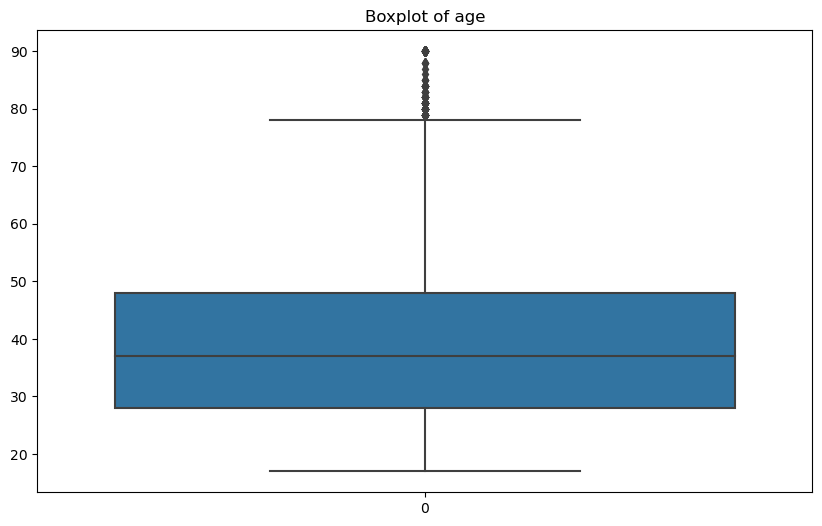

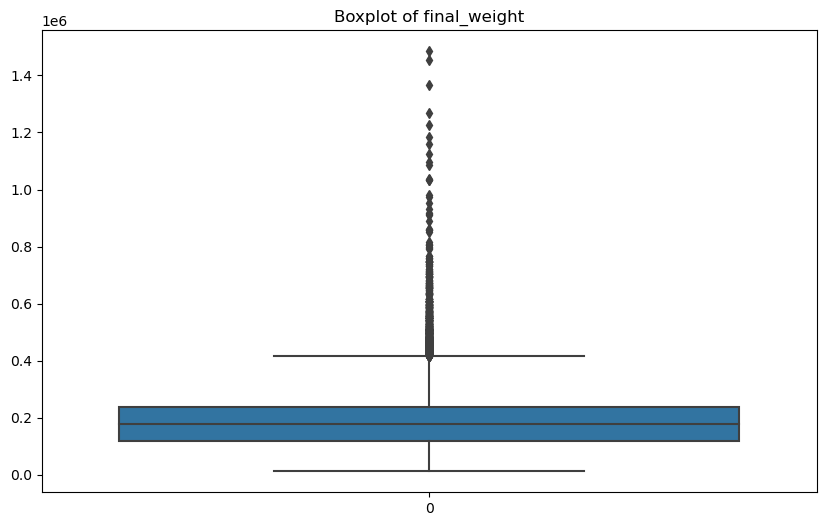

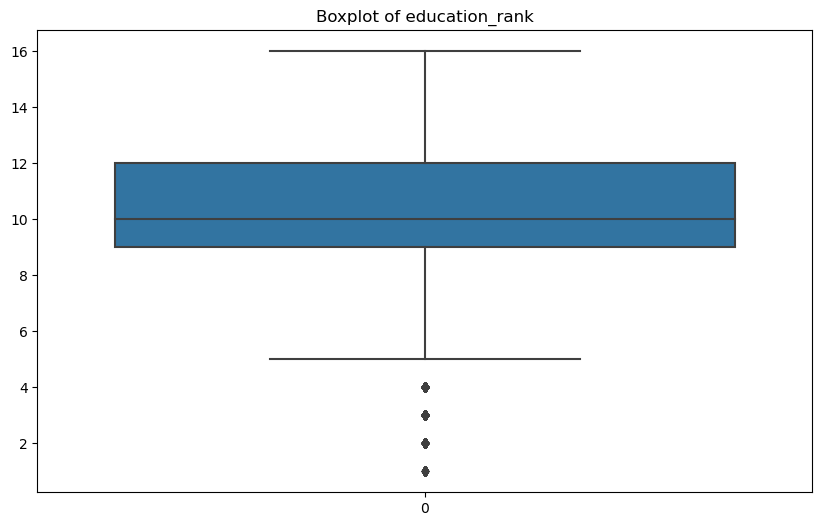

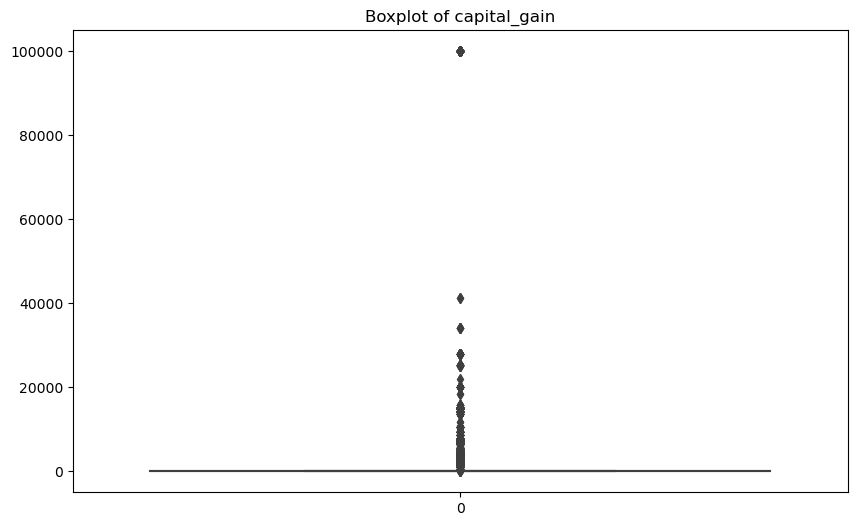

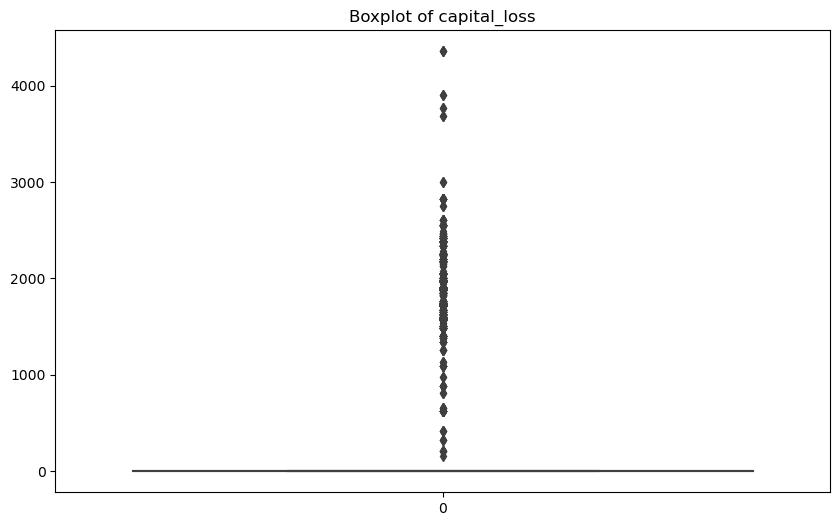

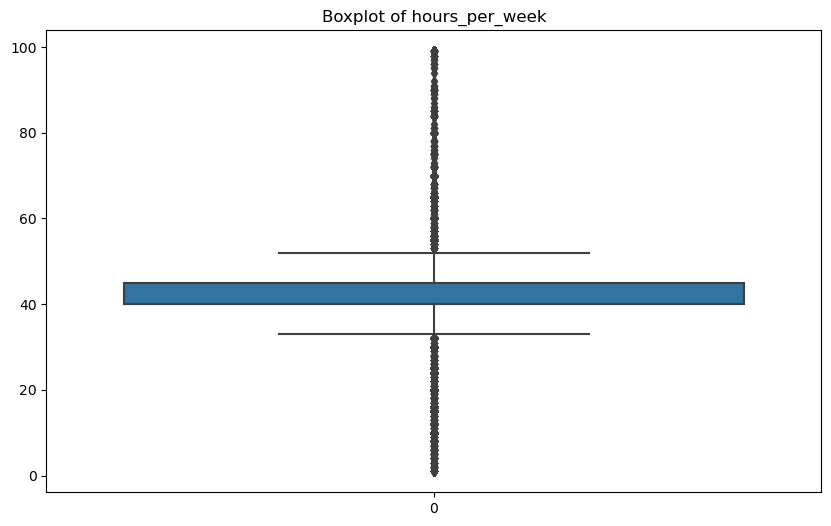

In [20]:
numeric_features = ['age', 'final_weight', 'education_rank', 'capital_gain', 'capital_loss', 'hours_per_week']

for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


---

# (a) EXPLORATORY DATA ANALYSIS

In [21]:
df.head()

,age,occupation_class,final_weight,education,education_rank,marital_status,occupation,relationship,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


## data summary

- get a summary of the central tendencies, spread, and shape of the dataset's distribution.

In [22]:
df_explore = df

descriptive_stats = df_explore.describe(include='all')

# View the descriptive statistics
descriptive_stats

,age,occupation_class,final_weight,education,education_rank,marital_status,occupation,relationship,gender,capital_gain,capital_loss,hours_per_week,native_country,income
count,32537.000000,32537,3.253700e+04,32537,32537.000000,32537,32537,32537,32537,32537.000000,32537.000000,32537.000000,32537,32537
unique,NaN,9,NaN,16,NaN,7,15,6,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22673,NaN,10494,NaN,14970,4136,13187,21775,NaN,NaN,NaN,29153,24698
mean,38.585549,NaN,1.897808e+05,NaN,10.081815,NaN,NaN,NaN,NaN,1078.443741,87.368227,40.440329,NaN,NaN
std,13.637984,NaN,1.055565e+05,NaN,2.571633,NaN,NaN,NaN,NaN,7387.957424,403.101833,12.346889,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.369930e+05,NaN,12.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


#### Numeric Features:

**Age:**
Ranges from 17 to 90 years.
The average age is approximately 38.6 years.
50% of the people are below 37 years and 75% are below 48 years.

**Final_weight:**
Has a wide range (from 12,285 to 1,484,705).
The average (mean) is around 189,780, but the distribution seems skewed given the difference between the mean and median (50th percentile).

**Education_rank:**
Varies from 1 to 16.
The average is 10, with 50% of individuals having an education rank of 10 or below.

**Capital_gain and Capital_loss:**
Most people have a capital gain of 0, but it can go up to 99,999. Similarly, the majority of people have no capital loss, but it can be as high as 4,356.
These features might be very skewed, and transformations may be necessary if used for modeling.

**Hours_per_week:**
The average working hours are around 40.4 hours per week, which makes sense as it's the typical full-time work duration.
It ranges from 1 to 99 hours, indicating some people might be working part-time or multiple jobs.


#### Categorical Features:

**Occupation_class:**
Most people (22,673) work in the "Private" sector.
There are 9 unique occupation classes.

**Education:**
There are 16 unique education levels.
The most common education level is "HS-grad" with 10,494 individuals.

**Marital_status:**
7 unique marital statuses.
The majority (14,970) are "Married-civ-spouse".

**Occupation:**
15 unique occupations.
"Prof-specialty" is the most common occupation with 4,136 individuals.

**Relationship:**
6 unique relationships.
"Husband" is the most common relationship type, indicating a possible skew in the dataset towards male respondents or those identifying as "Husbands".

**Gender:**
We have more males (21,775) than females.

**Native_country:**
42 unique countries.
The majority (29,153) are from the "United States".

**Income:**
Two categories.
A significantly larger number of individuals (24,698) have an income of <= 50K" compared to those earning more.

--

### Key Observations:
Skewness: Some features (like capital_gain and capital_loss) seem to be highly skewed, which might require transformations.

Imbalance: The target variable income is imbalanced, with more people earning "≤50K". This is crucial to note when modeling, as it could affect model performance.

Granularity: Features like native_country have many unique values; you might need to group some less frequent categories together.

## Visualize Distributions:
- #### For numeric features:

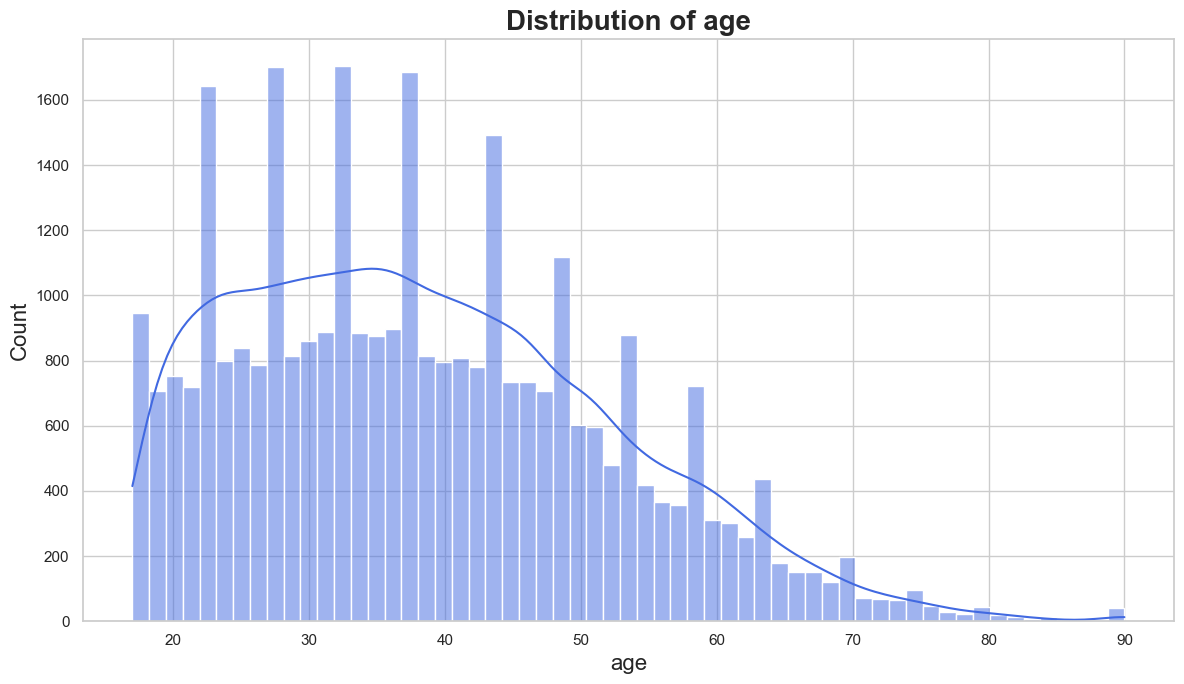

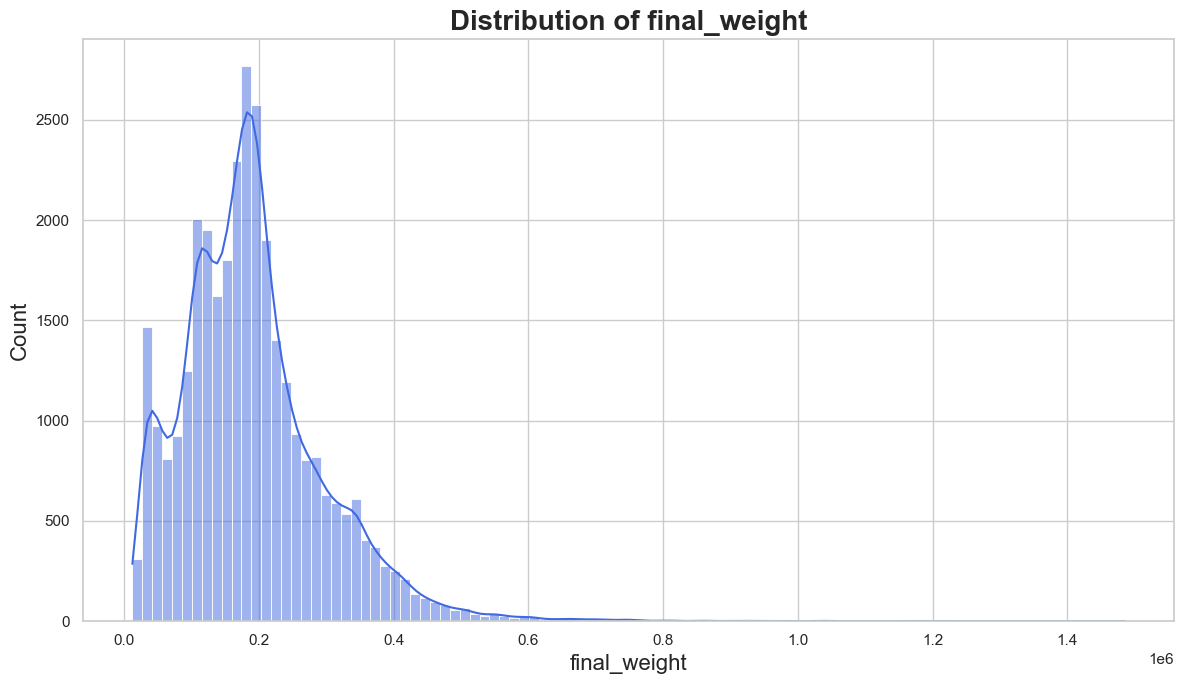

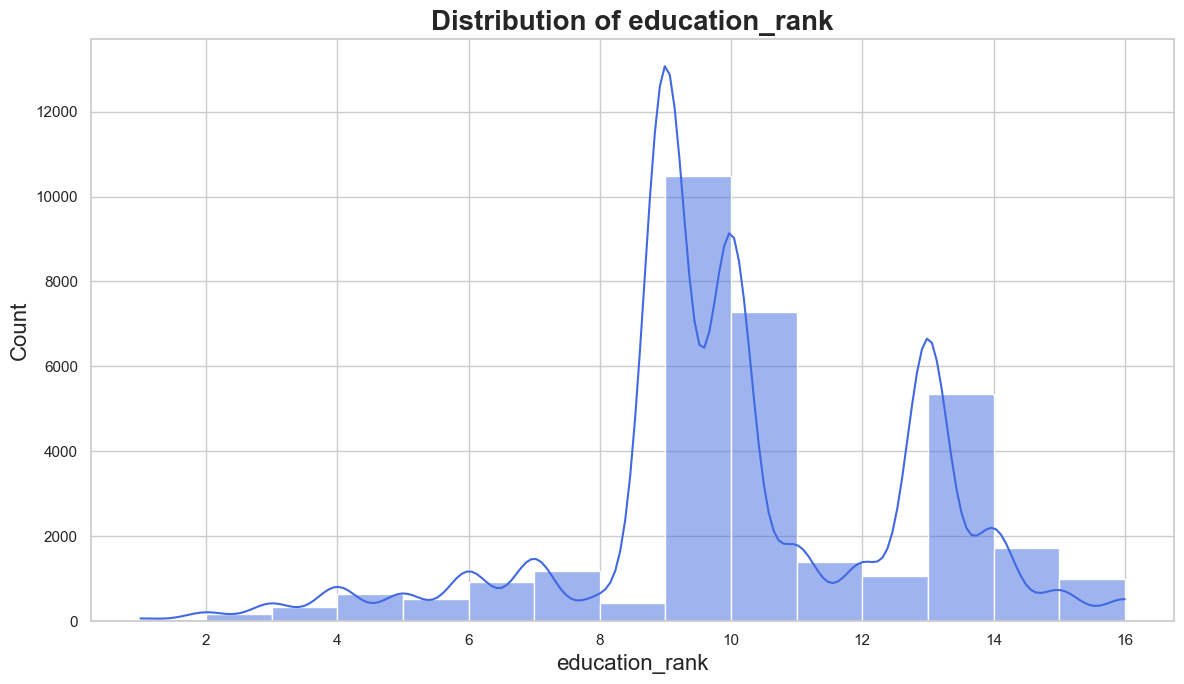

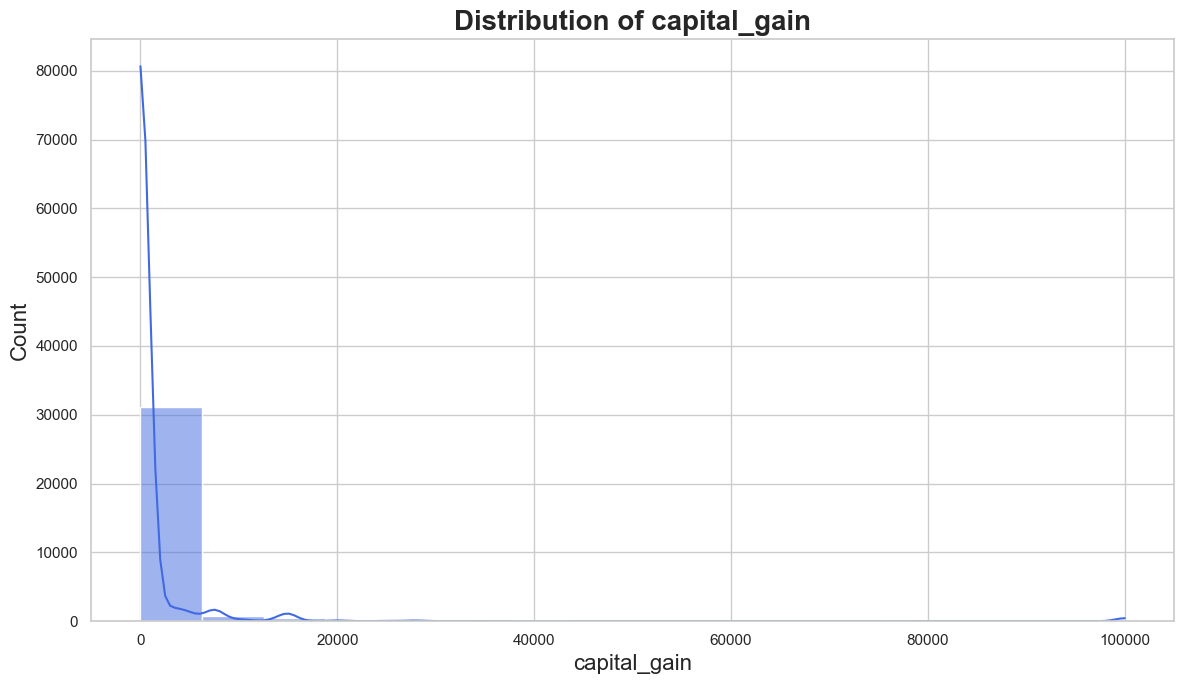

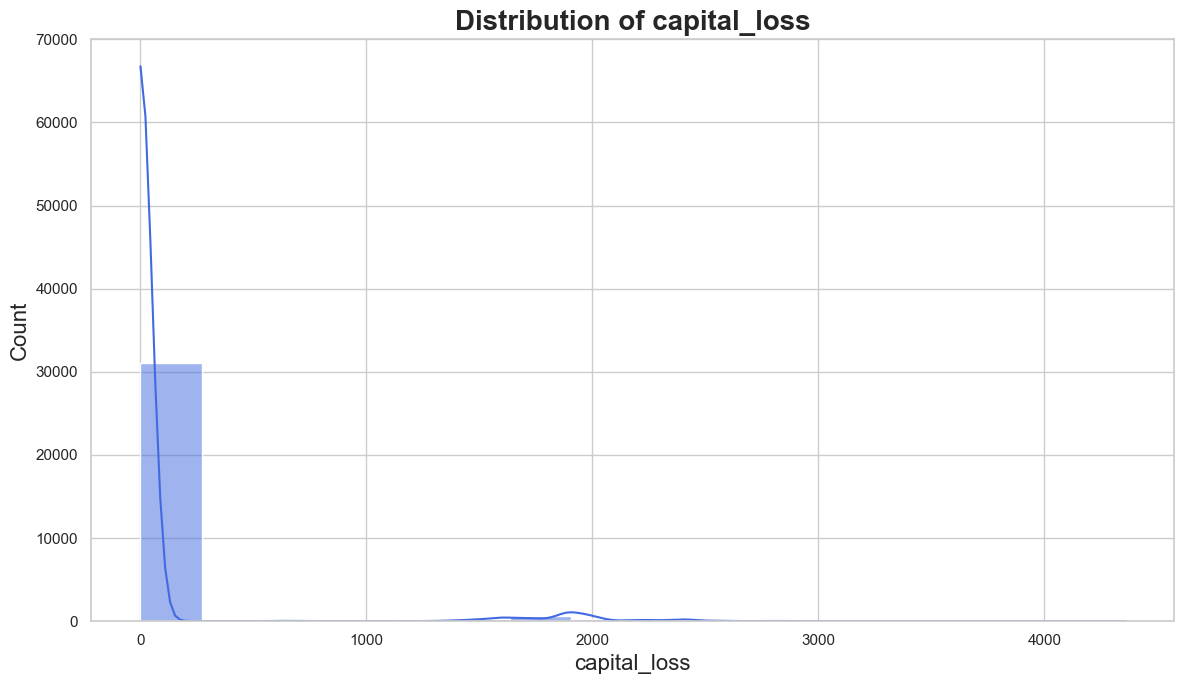

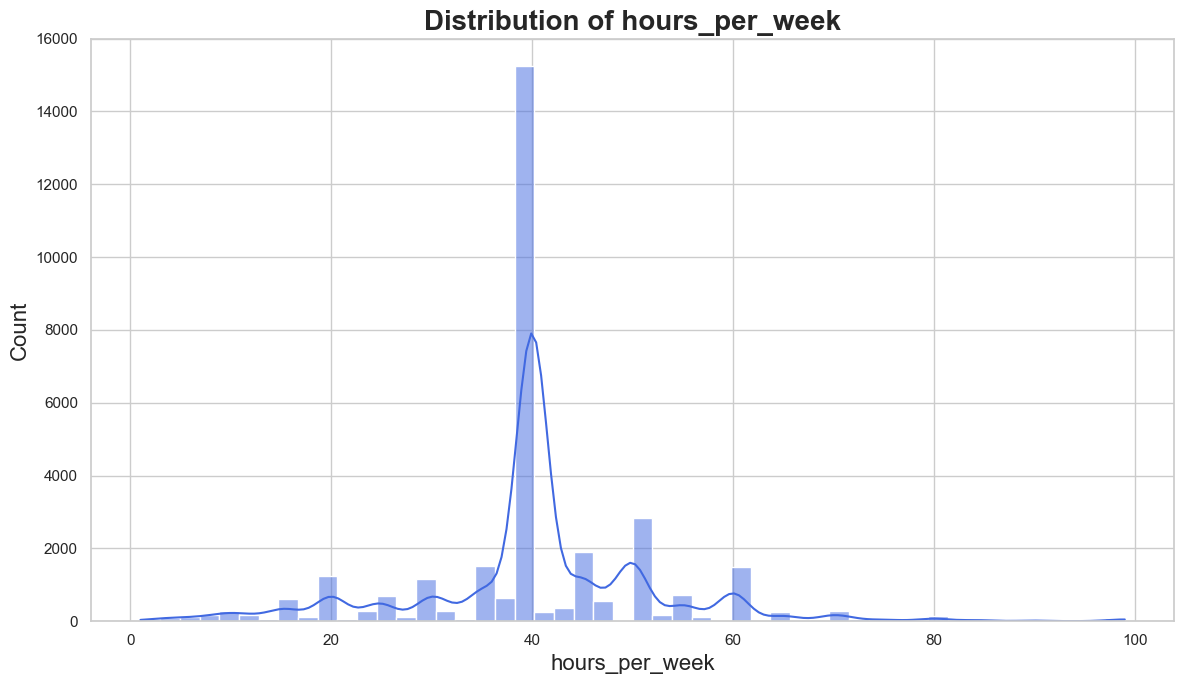

In [23]:
numeric_features = ['age', 'final_weight', 'education_rank', 'capital_gain', 'capital_loss', 'hours_per_week']

sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set_context("notebook")

for feature in numeric_features:
    plt.figure(figsize=(12, 7))
    
    # Adjusting number of bins for specific features
    if feature == 'hours_per_week':
        bins = 50  # or any other number that seems appropriate after visualization
    elif feature == 'final_weight':
        bins = 100
    elif feature == 'education_rank':
        bins = 15  # or any other number that seems appropriate
    else:
        bins = 'auto'  # for other features, let seaborn decide
    
    sns.histplot(df[feature], kde=True, color='royalblue', bins=bins)
    
    plt.title(f'Distribution of {feature}', fontsize=20, fontweight='bold')
    plt.xlabel(feature, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.tight_layout()
    plt.show()

- For categorical features:

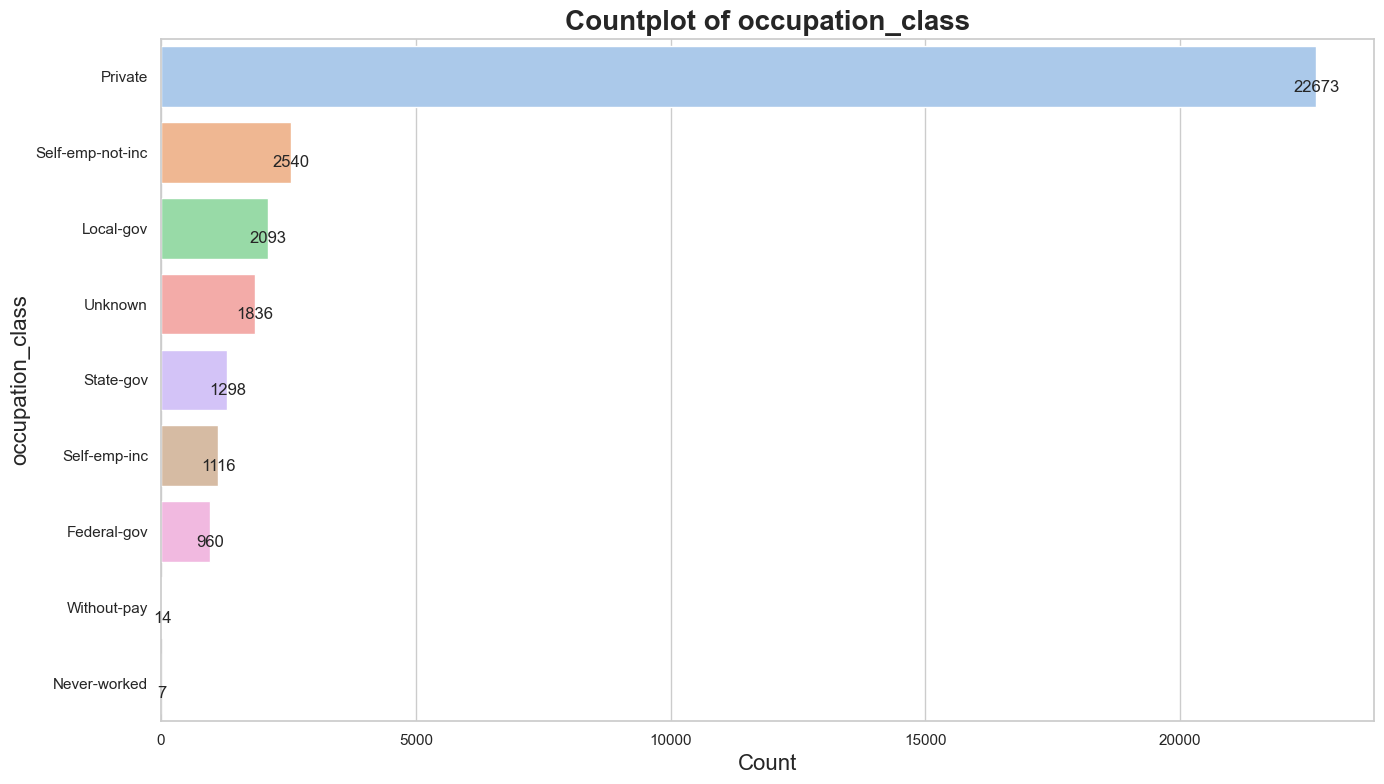

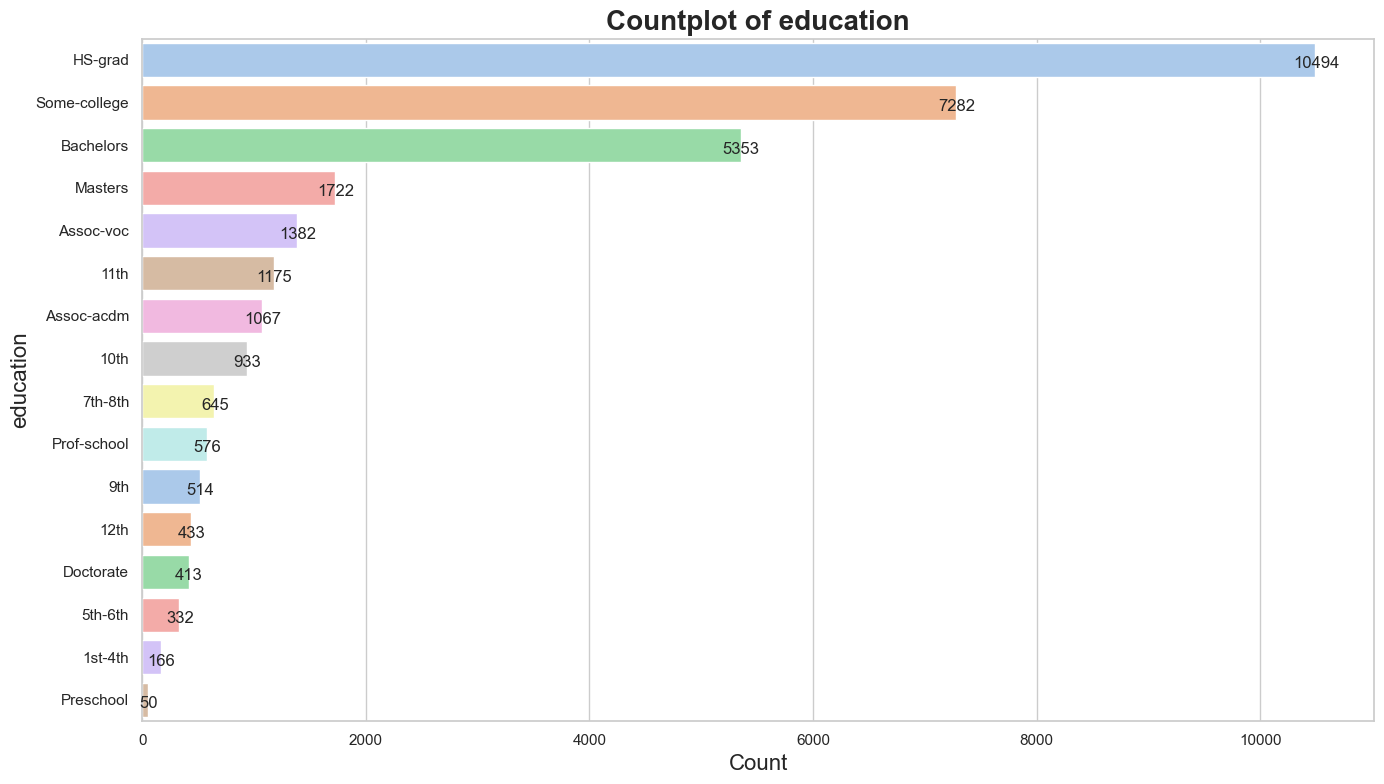

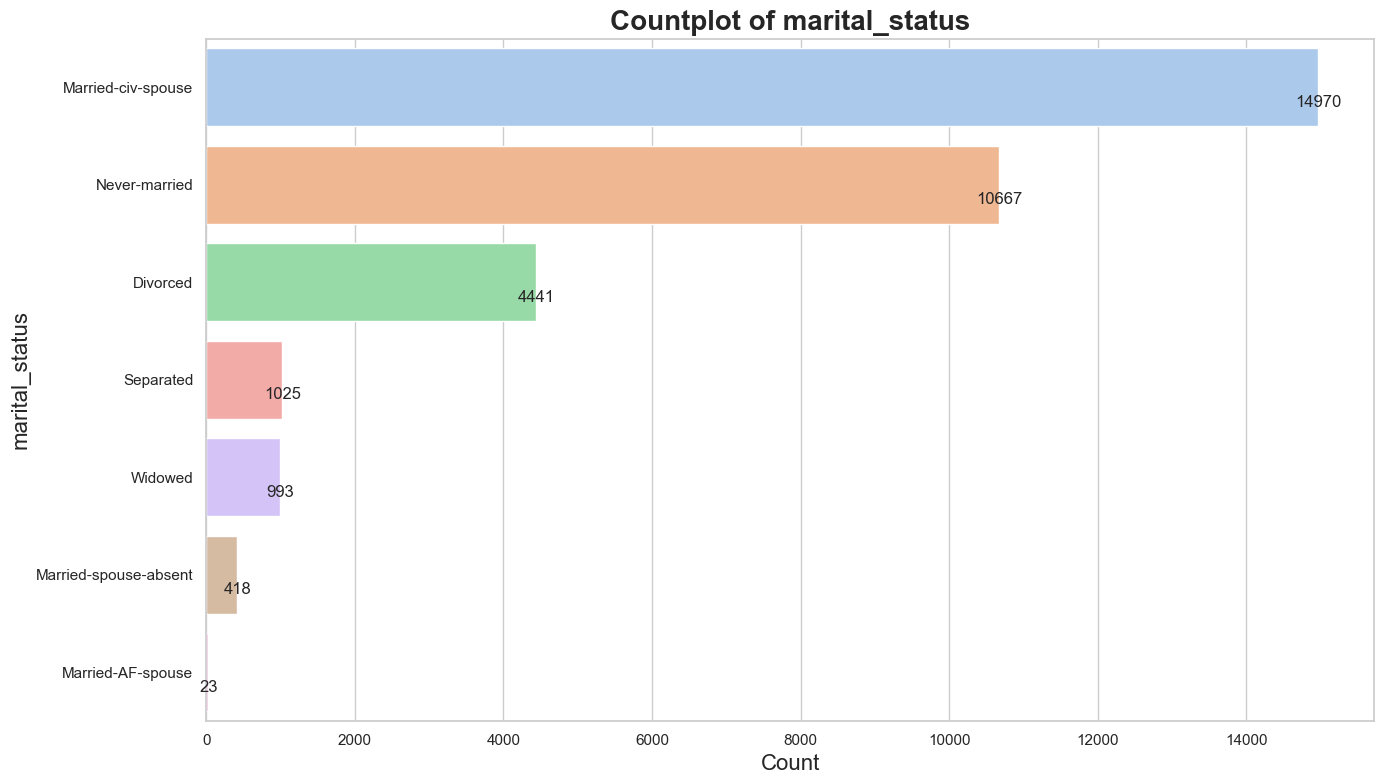

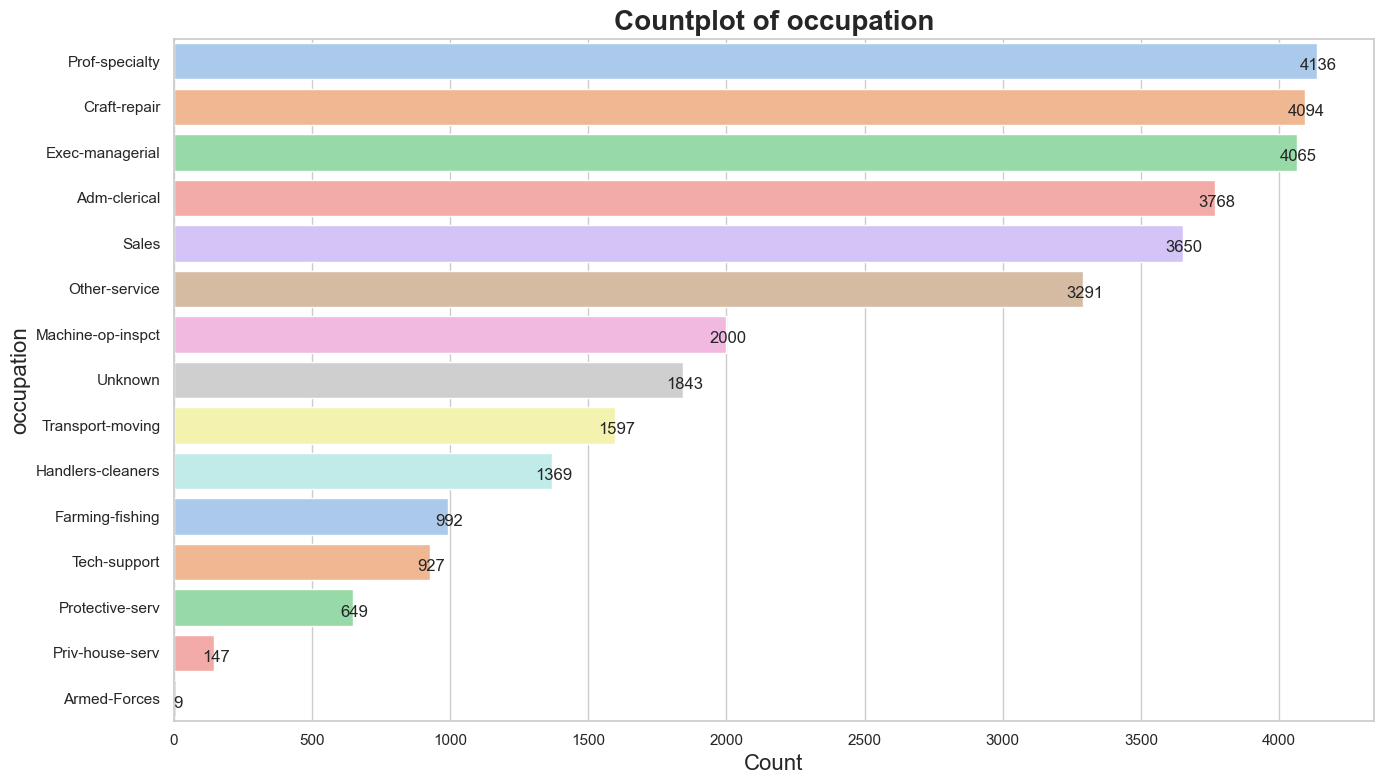

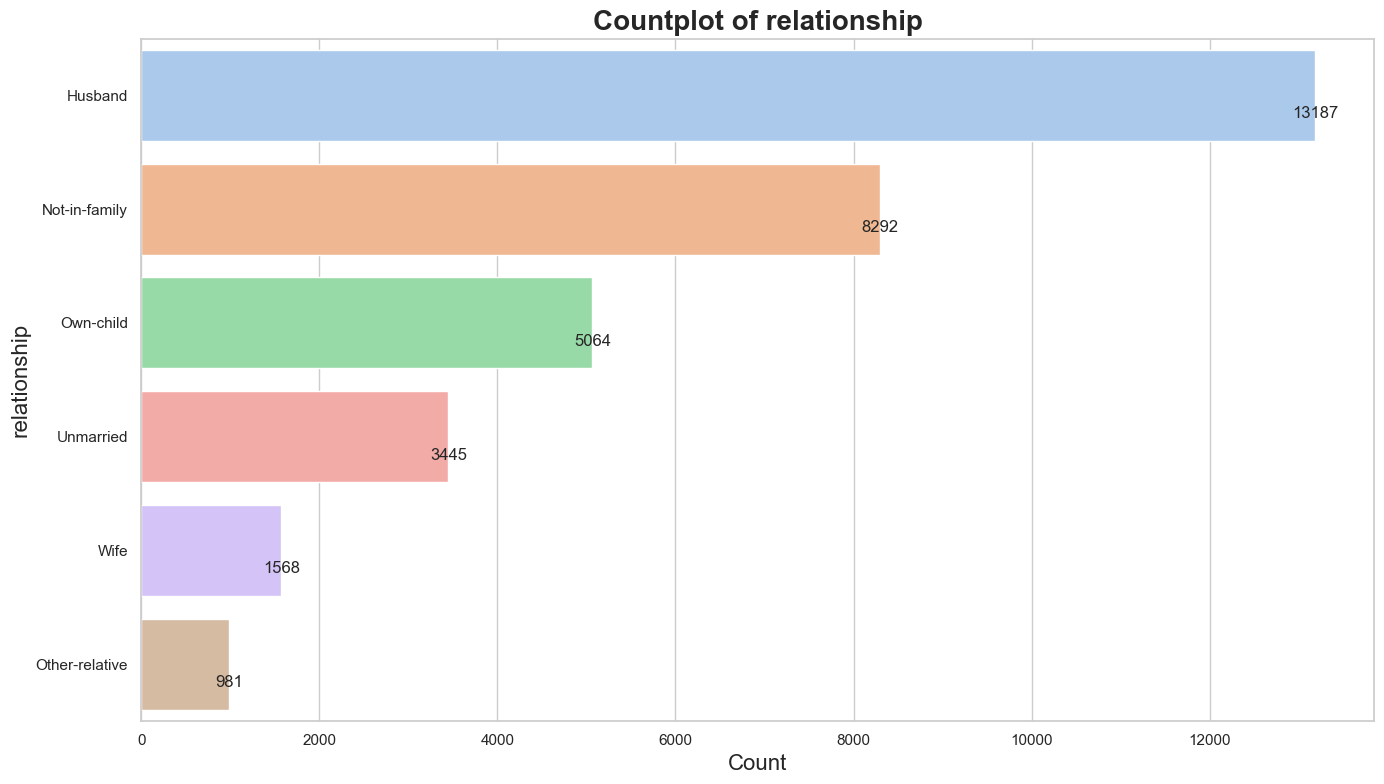

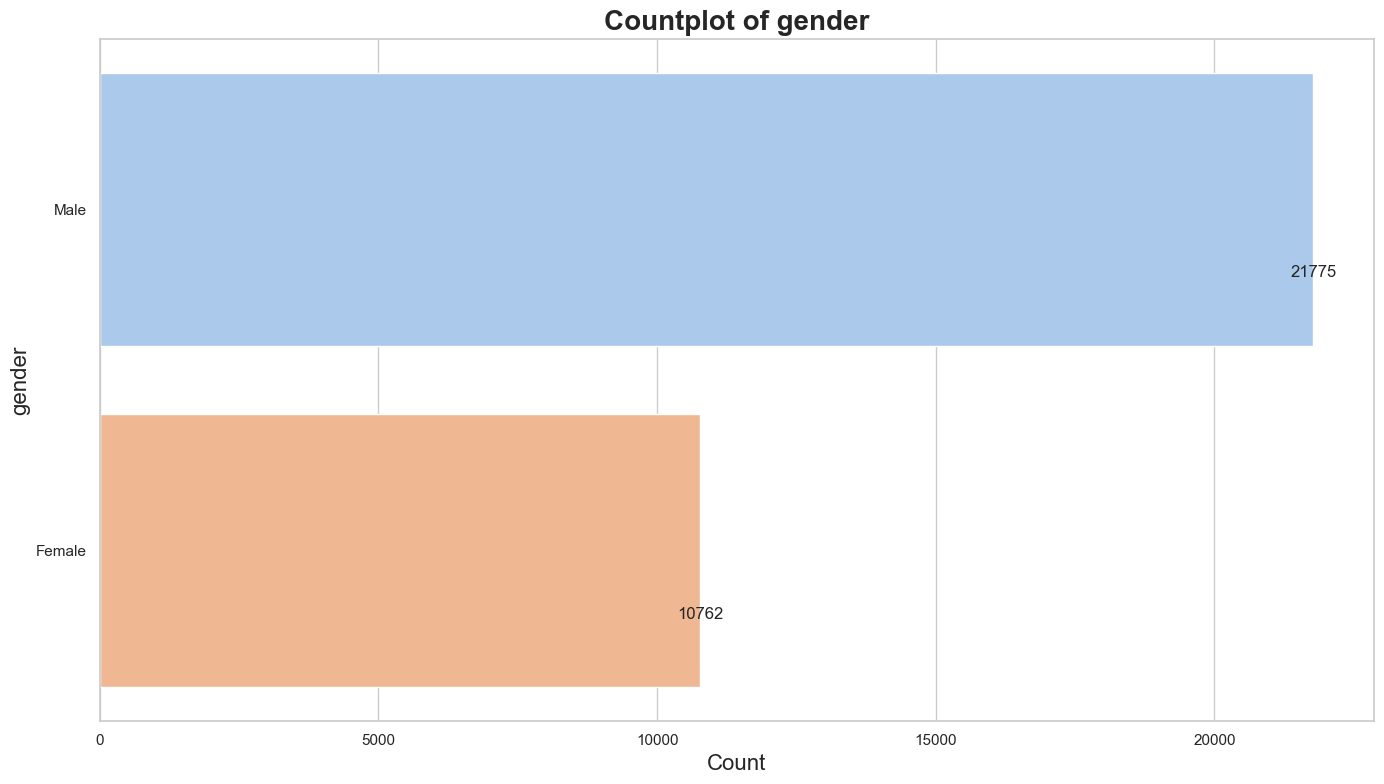

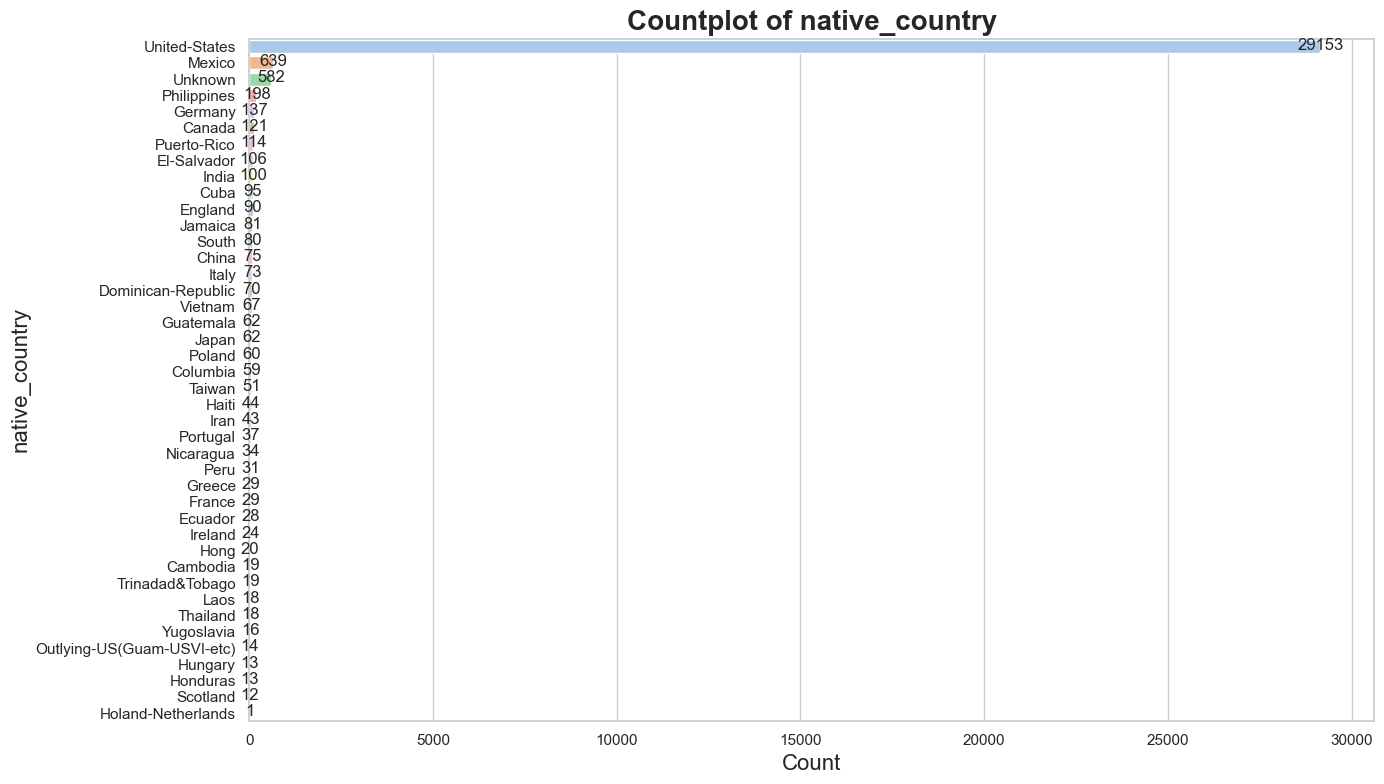

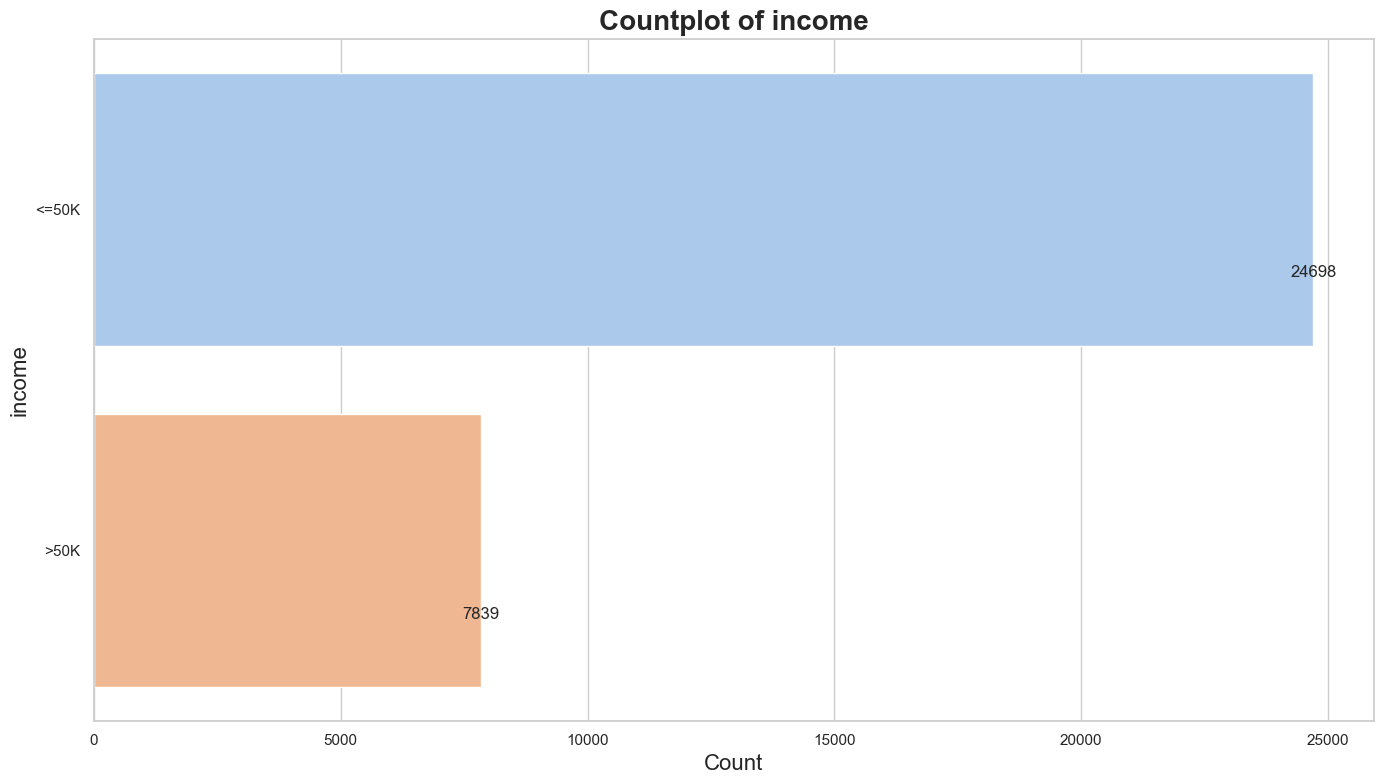

In [24]:
categorical_features = ['occupation_class', 'education', 'marital_status', 'occupation', 'relationship', 'gender', 'native_country', 'income']

sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set_context("notebook")

for feature in categorical_features:
    plt.figure(figsize=(14, 8))
    
    ax = sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette="pastel")
    
    # Annotate each bar with its count
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 5, 
                 p.get_y() + p.get_height()/2. + 0.2, 
                 '{:1.0f}'.format(width),
                 ha="center")
    
    plt.title(f'Countplot of {feature}', fontsize=20, fontweight='bold')
    plt.xlabel('Count', fontsize=16)
    plt.ylabel(feature, fontsize=16)
    plt.tight_layout()
    plt.show()


Visualize Relationships

We can use a boxplot to visualize the distribution of age across the two income classes.

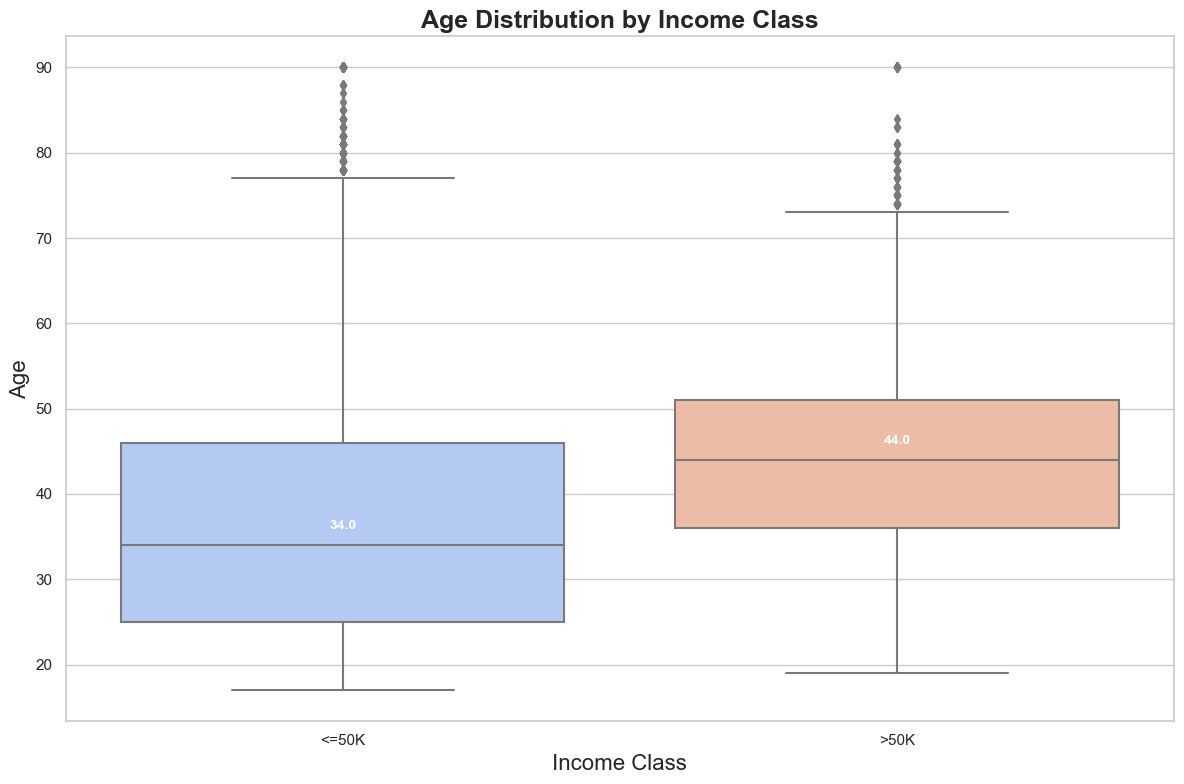

In [25]:
plt.figure(figsize=(12, 8))  # Increased the figure size for better clarity

# Using a differentiated color palette
palette = sns.color_palette("coolwarm", n_colors=len(df['income'].unique()))

sns.boxplot(x="income", y="age", data=df, palette=palette)

# Annotating the median value on the plot
ax = plt.gca()
medians = df.groupby(['income'])['age'].median().values
vertical_offset = df['age'].median() * 0.05  # Offset to avoid overlap of median value and the box

for xtick in ax.get_xticks():
    ax.text(xtick, medians[xtick] + vertical_offset, medians[xtick], 
            horizontalalignment='center', size='small', color='w', weight='semibold')

plt.title('Age Distribution by Income Class', fontsize=18, fontweight='bold')
plt.xlabel('Income Class', fontsize=16)
plt.ylabel('Age', fontsize=16)

plt.tight_layout()
plt.show()


## Correlation Analysis

### Pearson Correlation

In [26]:
corr_pearson = df.corr(numeric_only=True, method='pearson')
corr_pearson

,age,final_weight,education_rank,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
final_weight,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education_rank,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital_gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital_loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
hours_per_week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


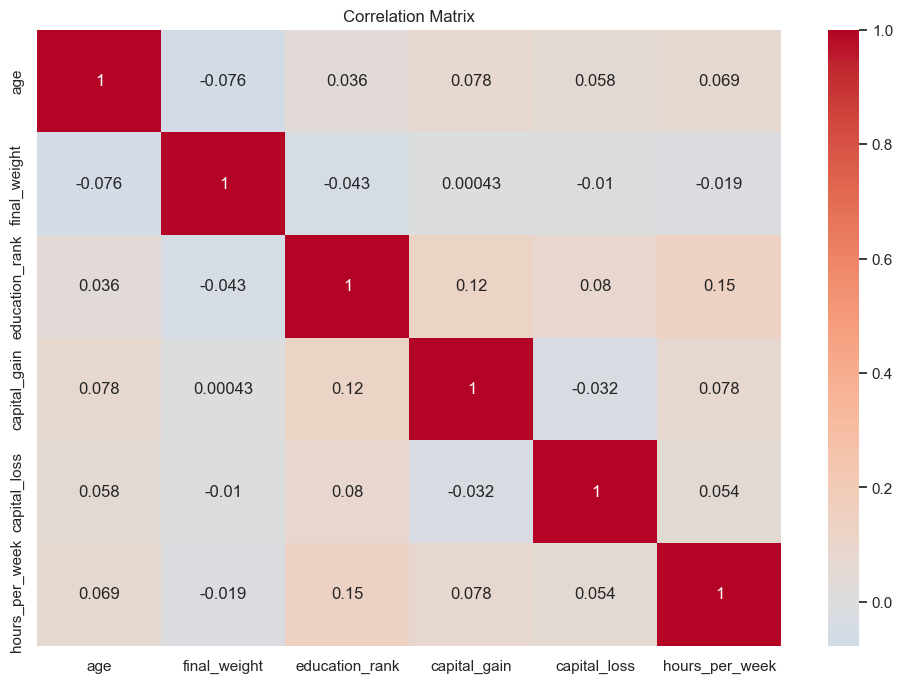

In [27]:
# plotting the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


### Spearman Correlation

In [28]:
# spearman correlation of numeric features
corr_spearman = df.corr(numeric_only=True, method='spearman')
corr_spearman

,age,final_weight,education_rank,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.077917,0.066199,0.124905,0.058433,0.142763
final_weight,-0.077917,1.000000,-0.035828,-0.006032,-0.006910,-0.021882
education_rank,0.066199,-0.035828,1.000000,0.119126,0.074730,0.167465
capital_gain,0.124905,-0.006032,0.119126,1.000000,-0.066622,0.093316
capital_loss,0.058433,-0.006910,0.074730,-0.066622,1.000000,0.059842
hours_per_week,0.142763,-0.021882,0.167465,0.093316,0.059842,1.000000


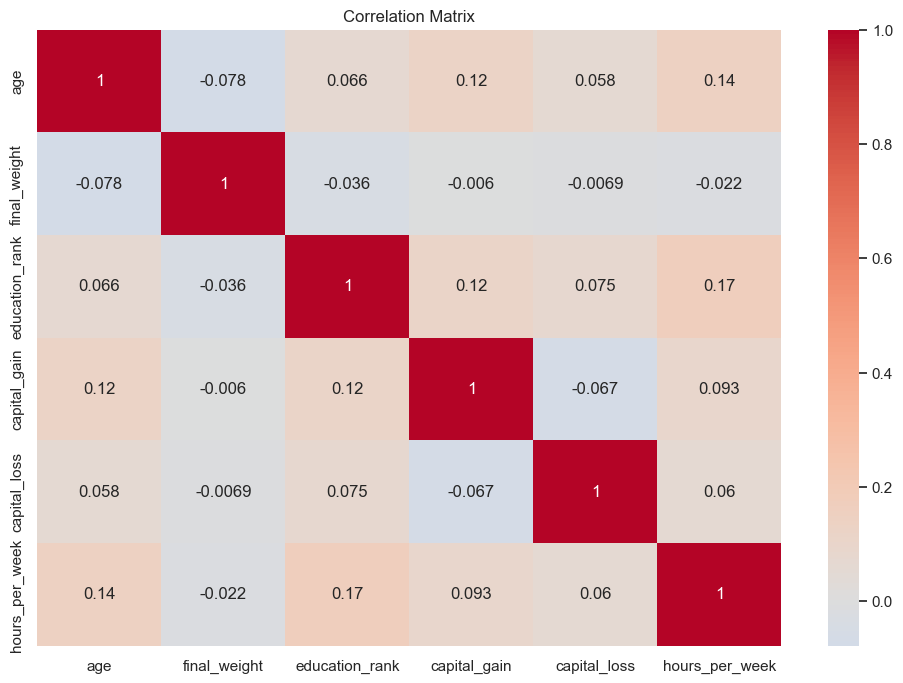

In [29]:
# plotting the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


## Categorical Data Encoding

To better prepare the data for correlational analysis with our target variable and model development, we will encode the categorical features.

- For the target variable 'income' and 'gender' variable label encoding would be apt since it's binary values.
- For features like 'occupation_class', 'education', 'marital_status', 'occupation', 'relationship', and 'native_country', one-hot encoding will be more appropriate.

- ### 'income' & 'gender' label encoding

In [30]:

def label_encode_column(df, column_name):
    
    le = LabelEncoder()
    
    df[column_name] = le.fit_transform(df[column_name])
    
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    
    print(f"{column_name} mapping: {mapping}")
    
    return df, le

# Dictionary to store the label encoders
encoders = {}

# Encoding 'income' column
df, encoders['income'] = label_encode_column(df, 'income')

# Encoding 'gender' column
df, encoders['gender'] = label_encode_column(df, 'gender')

income mapping: {'<=50K': 0, '>50K': 1}
gender mapping: {'Female': 0, 'Male': 1}


- ### one-hot encoding

The other categorical variables with more than two unique features will be one-hot encoded.

**One-hot encoding** is a widely-used method for encoding categorical variables with more than two unique categories. Here are some of its implications:

- **High Dimensionality:** One-hot encoding increases the feature space, especially for variables with many categories. While not problematic for numerous algorithms, it might require more computational resources.

- **Sparse Matrix:** The resulting matrix is often sparse (largely filled with 0s). Some algorithms handle sparse data better than others.

- **Collinearity:** When a feature is one-hot encoded, the derived binary columns are perfectly multicollinear. In a setting with _n_ unique categories, knowing _n−1_ columns' values gives away the nth column's value. 

_For instance, with categories A, B, C, and D, if feature_A, feature_B, and feature_C are all 0, feature_D must be 1._

 This can:
- Distort coefficients in linear regression, making them tricky to interpret.
- Increase the variance of the coefficient estimates.


#### Solution
To mitigate these issues, we will deploy a common strategy by dropping one binary column, breaking the perfect multicollinearity.

We will use drop_first=True in pd.get_dummies() to accomplishes this by omitting the first category.



In [31]:
def one_hot_encode(df, column_name):
    """
    Prints unique values and performs one-hot encoding on the specified column.
    
    Parameters:
    - df: pd.DataFrame : Input dataframe.
    - column_name: str : Column to be one-hot encoded.
    
    Returns:
    - df: pd.DataFrame : DataFrame after one-hot encoding.
    """
    print(f"Original {column_name}: {df[column_name].unique()}")
    df = pd.get_dummies(df, columns=[column_name], drop_first=True)
    print(df.head())
    return df

# Columns to be one-hot encoded
columns_to_encode = ['occupation_class', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']

for col in columns_to_encode:
    df = one_hot_encode(df, col)
    

Original occupation_class: ['Unknown' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc'
 'Self-emp-inc' 'Local-gov' 'Without-pay' 'Never-worked']
   age  final_weight     education  education_rank marital_status  \
0   90         77053       HS-grad               9        Widowed   
1   82        132870       HS-grad               9        Widowed   
2   66        186061  Some-college              10        Widowed   
3   54        140359       7th-8th               4       Divorced   
4   41        264663  Some-college              10      Separated   

          occupation   relationship  gender  capital_gain  capital_loss  ...  \
0            Unknown  Not-in-family       0             0          4356  ...   
1    Exec-managerial  Not-in-family       0             0          4356  ...   
2            Unknown      Unmarried       0             0          4356  ...   
3  Machine-op-inspct      Unmarried       0             0          3900  ...   
4     Prof-specialty      Own-chil

The native_country feature presents a challenge due to its 42 unique values. Using one-hot encoding, we will add 41 new columns (one less to sidestep multicollinearity).

The implications of this method include:

1. Dimensionality: Introducing 41 new features amplifies dimensionality, potentially necessitating more training data to yield meaningful outcomes—a dilemma often termed the "curse of dimensionality."

2. Sparsity: If certain countries are underrepresented, one-hot encoding will lead to a preponderance of zeros. Algorithms not adept at handling sparse data might not perform optimally.

3. Interpretability: While one-hot encoding often suits machine learning algorithms, it can dilute model interpretability due to the influx of features.

We will implement one-hot encoding as an initial approach, build our models, and evaluate their efficacy.

Post this primary phase, we will explore alternative encoding methods to enhance model performance, such as:

**Binning:** combining countries based on specific criteria, e.g., by continent or economic standing.

**Frequency Encoding:** Denoting each category with its frequency, thus converting the native_country feature into a singular column with distinct numbers symbolizing each nation.

----
----

## MODEL DEVELOPMENT

In [32]:
df.head()

,age,final_weight,education_rank,gender,capital_gain,capital_loss,hours_per_week,income,occupation_class_Local-gov,occupation_class_Never-worked,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Unknown,native_country_Vietnam,native_country_Yugoslavia
0,90,77053,9,0,0,4356,40,0,False,False,...,False,False,False,False,False,False,True,False,False,False
1,82,132870,9,0,0,4356,18,0,False,False,...,False,False,False,False,False,False,True,False,False,False
2,66,186061,10,0,0,4356,40,0,False,False,...,False,False,False,False,False,False,True,False,False,False
3,54,140359,4,0,0,3900,40,0,False,False,...,False,False,False,False,False,False,True,False,False,False
4,41,264663,10,0,0,3900,40,0,False,False,...,False,False,False,False,False,False,True,False,False,False


## LOGISTIC REGRESSION

In [33]:
X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Feature Scaling

In [34]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Train the Logistic Regression Model

In [35]:
log_reg = LogisticRegression(max_iter=10000)  # Increasing max_iter to ensure convergence
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

####  Validate the Model

In [36]:
y_pred = log_reg.predict(X_test)

#### Performance Metrics

In [37]:
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.8527965580823602

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      4988
           1       0.71      0.62      0.66      1520

    accuracy                           0.85      6508
   macro avg       0.80      0.77      0.78      6508
weighted avg       0.85      0.85      0.85      6508


Confusion Matrix:
 [[4607  381]
 [ 577  943]]


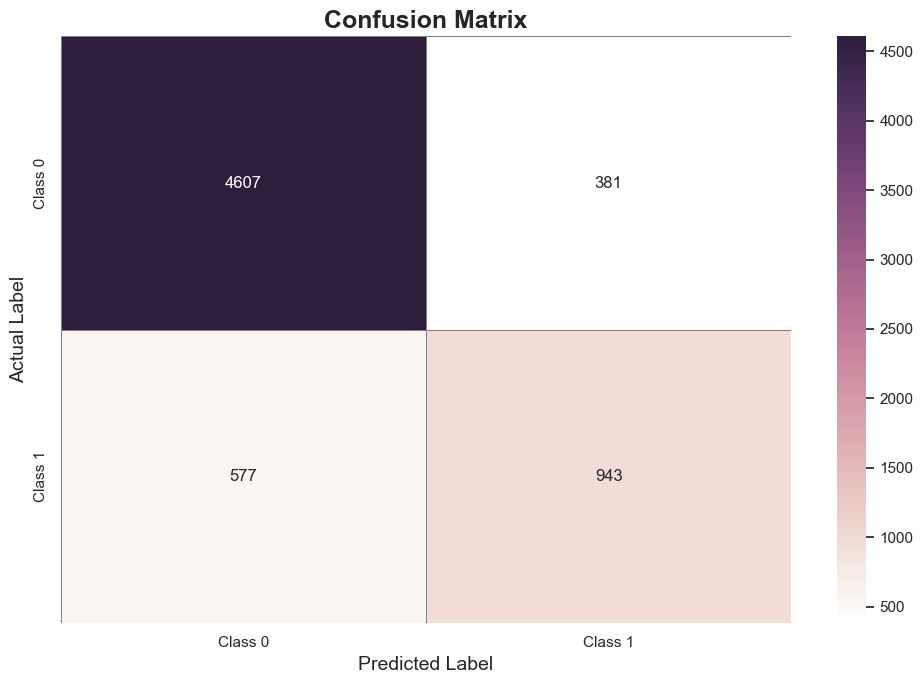

In [38]:
plt.figure(figsize=(10, 7))

# Use a sequential color palette
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=True, 
            linewidths=0.5, linecolor='gray')

# set tick labels based on your classes, e.g., ['Class 0', 'Class 1']
plt.xticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'])
plt.yticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'])

plt.title('Confusion Matrix', fontsize=18, fontweight='bold')
plt.ylabel('Actual Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

plt.tight_layout()
plt.show()


### Model Performance Insights:

1. **Overall Accuracy:** The model achieved an accuracy of 85.28%. This implies that the model predicted correctly for 85.28% of the test instances.

2. **Class Specific Performance:**
- Class 0 (<=50K): The model has higher precision and recall for Class 0, implying strong performance in predicting individuals earning <= $50,000 annually.
- Class 1 (>50K): Precision of 0.71 and recall of 0.62 highlight that while the model is relatively accurate when predicting this class, it tends to miss a significant portion (39%).

3. **Confusion Matrix Insights:**
- True Negatives: 4607 individuals correctly identified as earning <= $50,000.
- False Positives: 381 individuals wrongly classified as earning > $50,000.
- False Negatives: 577 high earners (> $50,000) were missed.
- True Positives: 943 individuals correctly identified as earning > $50,000.

#### Business Implications:
- Missed Opportunities: With 577 False Negatives, the model is missing out on targeting a significant number of potential high earners.
- Resource Misallocation: 381 False Positives indicate potential wasted resources on individuals who are low earners and might not be the target audience.
- Customer Experience: Misalignment between income and targeted offers can influence the customer experience negatively.


#### Potential Improvement Strategies:
- Resampling: Balance the dataset to give more representation to the minority class (Class 1).
- Feature Engineering: Consider interactions or new features that might improve prediction power.
- Model Optimization: Using models allowing for class weighting, and tune - hyperparameters influencing precision-recall balance.

### Model Optimisation - LogReg

In [39]:
# Define hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'class_weight': [None, 'balanced']
}


# Logistic Regression with GridSearchCV
log_reg = LogisticRegression(max_iter=10000)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the model with the best parameters to make predictions
y_pred = grid_search.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 0.8527965580823602

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      4988
           1       0.71      0.62      0.66      1520

    accuracy                           0.85      6508
   macro avg       0.80      0.77      0.78      6508
weighted avg       0.85      0.85      0.85      6508



## Random Forest Classification

#### Data Splitting:
We'll start by splitting the data into training and testing sets:

In [40]:
X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model
Next, we'll initialize the Random Forest classifier, fit it to our training data, and then evaluate its accuracy on the testing data.

In [41]:
# Initialize Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)  # using 100 trees

# Train the model
rfc.fit(X_train, y_train)

# Predict on the test data
predictions = rfc.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Random Forest Classifier Accuracy: {accuracy * 100:.2f}%")

# Classification report for detailed performance metrics
report = classification_report(y_test, predictions)
print(report)

cm = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:\n", cm)

Random Forest Classifier Accuracy: 85.69%
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4988
           1       0.72      0.64      0.68      1520

    accuracy                           0.86      6508
   macro avg       0.81      0.78      0.79      6508
weighted avg       0.85      0.86      0.85      6508


Confusion Matrix:
 [[4601  387]
 [ 544  976]]


#### Visualise Confusion Matrix

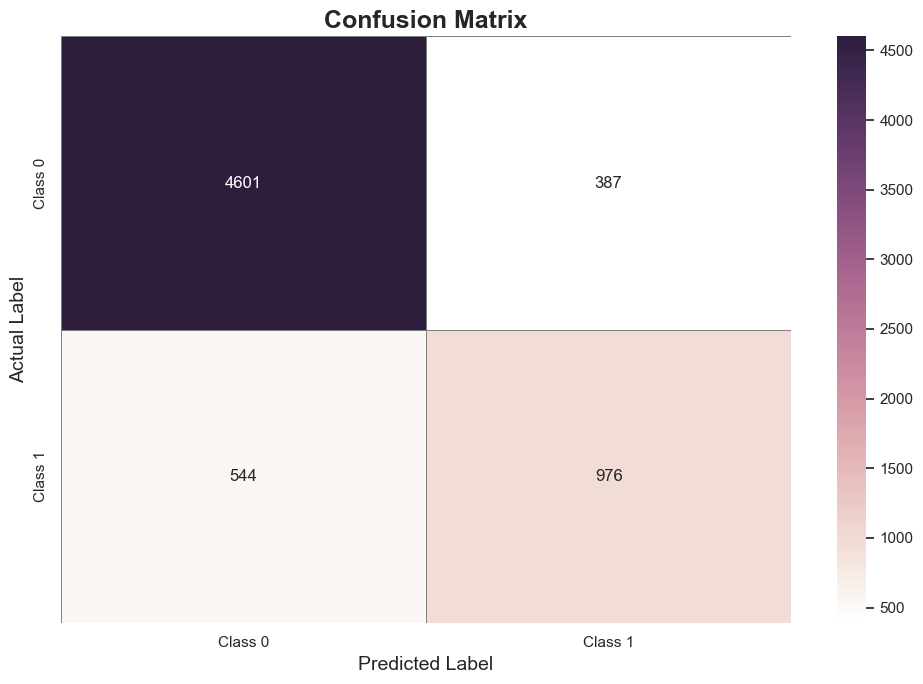

In [42]:
plt.figure(figsize=(10, 7))

# Use a sequential color palette
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=True, 
            linewidths=0.5, linecolor='gray')


# set tick labels based on your classes, e.g., ['Class 0', 'Class 1']
plt.xticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'])
plt.yticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'])

plt.title('Confusion Matrix', fontsize=18, fontweight='bold')
plt.ylabel('Actual Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

plt.tight_layout()
plt.show()



### Model Performance Insights:


1. **Overall Accuracy:**
The model predicts an individual's income bracket with an accuracy of 85.62%. In other words, in 85.62% of instances, the model's predictions align with the actual income bracket.

2. **Class Specific Performance:**
- Class 0 (income <=50K):
Precision (0.89): For every 100 predictions of incomes <=50K, 89 are accurate.
Recall (0.92): Of all 100 individuals in the <=50K bracket, the model identifies 92% of them accurately.
- Class 1 (income >50K):
Precision (0.72): For every 100 predictions of incomes >50K, 72 are correct.
Recall (0.64): The model correctly identifies only 63 out of every 100 individuals who genuinely earn more than $50,000.

**3. F1-Score:**
For individuals earning more than $50,000, the F1-Score of 0.68 indicates that there's a balanced prediction capability, but there's still potential for enhancement.

--
#### Business Implications:
- Missed Opportunities: The model overlooks 37% of individuals earning more than $50,000. For campaigns targeting this demographic, this shortfall might lead to suboptimal results.
- Resource Misallocation: A 28% inaccuracy in targeting those earning more than $50,000 might lead to wasted resources.

--
#### Potential Improvement Strategies:
- Resampling Techniques: Adjust the class distribution to enhance model performance, especially for the minority class.

- Feature Engineering: Refining or introducing new features might boost the model's prediction capability.

- Model Tuning: Tweaking hyperparameters might optimize the model's performance, especially for the higher income bracket.

- Advanced Models: Ensemble models or state-of-the-art algorithms could offer better predictive accuracy and balance.

### Model Optimisation - RanFor

#### Hyperparameter Tuning

For the hyperparameter tuning, a grid search approach will be employed using the GridSearchCV function from the scikit-learn library. 

The grid search will be executed over a predefined parameter grid that will consist of four key hyperparameters: n_estimators, max_features, max_depth, and min_samples_split.

The grid search will be conducted using 3-fold cross-validation to evaluate each combination of hyperparameters. Parallel processing will be enabled to expedite the search, utilizing all available CPU cores.

Upon completion, the optimal hyperparameters will be identified and will be used to train a final RandomForestClassifier model.

This approach will aim to ensure that the chosen model will be rigorously tuned for better generalization on unseen data.

In [43]:
# Create the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize a base Random Forest Classifier
base_rfc = RandomForestClassifier(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=base_rfc, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the Grid Search
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Initialize and fit the model with best hyperparameters
best_rfc = RandomForestClassifier(**best_params, random_state=42)
best_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}


RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200,
                       random_state=42)

#### Evaluate on test data

In [44]:
# Generate predictions on the test set
best_predictions = best_rfc.predict(X_test)

best_accuracy = accuracy_score(y_test, best_predictions)
print(f"Random Forest Classifier Accuracy with Best Hyperparameters: {best_accuracy * 100:.2f}%")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, best_predictions)
print("Confusion Matrix:")
print(cm)

# Calculate class-specific performance metrics
report = classification_report(y_test, best_predictions, target_names=['<=50K', '>50K'])
print("Classification Report:")
print(report)

Random Forest Classifier Accuracy with Best Hyperparameters: 86.49%
Confusion Matrix:
[[4723  265]
 [ 614  906]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      4988
        >50K       0.77      0.60      0.67      1520

    accuracy                           0.86      6508
   macro avg       0.83      0.77      0.79      6508
weighted avg       0.86      0.86      0.86      6508



### Model Comparison

After optimizing the hyperparameters, the performance of the Random Forest Classifier improved marginally from an accuracy of 85.62% to 86.36%. However, this higher-level metric doesn't tell the whole story. 

We can see changes in the class-specific performance by comparing the classification reports and confusion matrices of both models.

--
#### Comparison of Classification Report:
*Class 0 (income <= 50K):*
- Precision: Improved from 0.89 to 0.88
- Recall: Improved from 0.93 to 0.95
- F1-score: Remained constant at 0.91

*Class 1 (income > 50K):*
- Precision: Increased from 0.72 to 0.77
- Recall: Decreased from 0.63 to 0.60
- F1-score: Decreased to 0.67

--
#### Comparison of Confusion Matrix:
*Previous Model:*
- True Positives (<=50K): 4601
- False Negatives (<=50K): 544
- False Positives (>50K): 387
- True Negatives (>50K): 976

*Current Model:*
- True Positives (<=50K): 4723
- False Negatives (<=50K): 614
- False Positives (>50K): 265
- True Negatives (>50K): 906

--
#### Insights:
- Class <=50K: The model has become better at identifying this class, as evidenced by an increase in recall from 0.93 to 0.95.

- Class >50K: The model's precision for this class has improved, but at the cost of reduced recall. This suggests that while the model's predictions for incomes >50K have become more accurate, it is also missing out on more actual instances of this class.

- Overall: The F1-score for both classes has remained relatively constant, indicating that despite the hyperparameter tuning, the model's balance between precision and recall has not significantly improved for either class.

--
#### Recommendations
Given these insights, further work could involve exploring different feature engineering techniques or machine learning algorithms that are more sensitive to the imbalanced classes. Special attention should be given to improving the recall for the >50K class without significantly affecting other metrics.

## SUPPORT VECTOR MACHINE

#### Splitting the data:

In [45]:
# Separate features and target variable
X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Scaling the data:
Support Vector Machines are sensitive to feature scales. Hence, it is often a good practice to scale the data:

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### TRAINING SVM

In [47]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

#### Making Predictions and Evaluating:

In [48]:
y_pred = svm_model.predict(X_test)

# Print the accuracy score and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.8489551321450522

              precision    recall  f1-score   support

           0       0.88      0.94      0.90      4988
           1       0.73      0.57      0.64      1520

    accuracy                           0.85      6508
   macro avg       0.80      0.75      0.77      6508
weighted avg       0.84      0.85      0.84      6508

[[4666  322]
 [ 661  859]]


#### Visualise Confusion Matrix

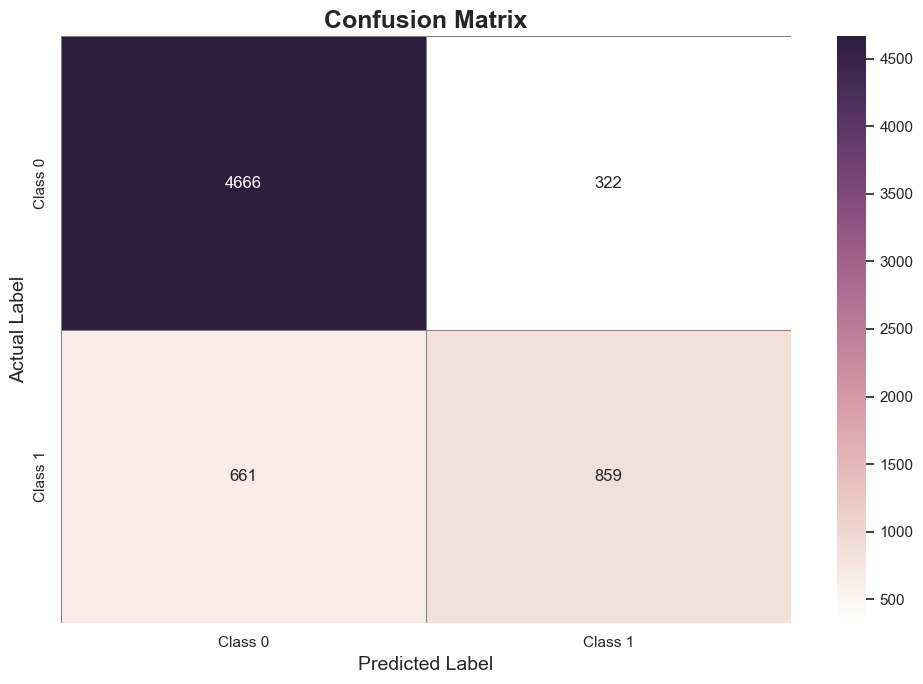

In [49]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))

# Use a sequential color palette
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=True, 
            linewidths=0.5, linecolor='gray')


# set tick labels based on your classes, e.g., ['Class 0', 'Class 1']
plt.xticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'])
plt.yticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'])

plt.title('Confusion Matrix', fontsize=18, fontweight='bold')
plt.ylabel('Actual Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

plt.tight_layout()
plt.show()


### Model Performance Insights:

1. **Overall Accuracy:**
The model has an accuracy of 84.90%, indicating that it correctly predicts the income bracket for approximately 85 out of 100 individuals.

2. **Class Specific Performance:**
- Class 0 (<=50K): The model exhibits a commendable performance for Class 0 with a precision of 0.88 and recall of 0.94. This denotes its strong capability in predicting individuals who earn <= $50,000 annually.

- Class 1 (>50K): Precision and recall values of 0.73 and 0.57, respectively, spotlight that while the model is reasonably accurate in predicting individuals earning > $50,000, it misses a substantial portion, which amounts to 43%.

3. **Confusion Matrix Insights:**
- True Negatives: 4666 individuals were correctly identified as earning <= $50,000.

- False Positives: 322 individuals were mistakenly classified as earning > $50,000.

- False Negatives: 661 high earners (> $50,000) were overlooked by the model.

- True Positives: 859 individuals were accurately identified as earning > $50,000.


#### Business Implications:
- Missed Opportunities: The model's inability to correctly classify 661 individuals as high earners indicates significant missed targeting opportunities.

- Resource Misallocation: 322 False Positives might lead to wasted resources, targeting those not fitting the desired profile.

- Customer Experience: Wrongly targeting individuals based on inaccurate income predictions can negatively affect customer perceptions and experience.


#### Potential Improvement Strategies:
- Resampling Techniques: Investigate methods like oversampling of Class 1 to address any class imbalances.

- Feature Engineering: Delve into the current dataset to identify potential feature interactions or even extract new features that could amplify the model's predictive prowess.

- Model Optimization: Given the imbalanced nature of recall between the classes, consider models that support class weighting. Furthermore, the exploration of hyperparameters that might bolster the precision-recall equilibrium could be advantageous.

### Model Optimisation - SVM

#### Hyperparameter Tuning

In [50]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

param_grid = {
    'svm__C': [1, 10],
    'svm__kernel': ['linear'],
    'svm__gamma': ['auto', 'scale']
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters: {'svm__C': 10, 'svm__gamma': 'auto', 'svm__kernel': 'linear'}
Best cross-validation accuracy: 0.8507050204024544


#### Evaluate performance on test data

In [51]:
# Predict on the test set
y_pred = grid_search.predict(X_test)

# Calculate and print the accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

# print the confusion matrix, classification report
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Test Accuracy: 0.8538721573448064
[[4646  342]
 [ 609  911]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4988
           1       0.73      0.60      0.66      1520

    accuracy                           0.85      6508
   macro avg       0.81      0.77      0.78      6508
weighted avg       0.85      0.85      0.85      6508



### Post-Optimization Analysis
Model Performance Insights:
Overall Accuracy:
Before Optimization: 84.90%
After Optimization: 85.39%
The slight increase in overall accuracy suggests that the hyperparameter optimization did yield some improvement, albeit marginal.

*Class Specific Performance:*
- Class 0 (<=50K):
Precision increased from 0.88 to 0.88 (no change)
Recall decreased from 0.94 to 0.93
- Class 1 (>50K):
Precision remained the same at 0.73
Recall increased from 0.57 to 0.60
The increased recall for Class 1 implies that the optimized model is better at identifying individuals who earn more than $50,000 compared to the previous model.

*Confusion Matrix Insights:*
- True Negatives: 4646 (Down by 20)
- False Positives: 342 (Up by 20)
- False Negatives: 609 (Down by 52)
- True Positives: 911 (Up by 52)

*Business Implications:*
- Missed Opportunities: Reduced from 661 to 609, a positive outcome.
- Resource Misallocation: Increased slightly from 322 to 342, indicating a marginal waste in resources.
- Customer Experience: With an improvement in the detection of high earners, the customer experience should improve marginally.

--
#### Conclusions and Future Strategies:
- Targeted Resampling: Given that the recall for Class 1 has improved but still not ideal, you might still consider oversampling this class or using other techniques like SMOTE.

- Feature Importance: Revisit the features being used and consider employing techniques for feature selection. The slightly increased False Positives suggest that there might be features that are misleading the model.

## K-MEANS CLUSTERING

The nature of the task is a classification, hence using a clustering algorithims is an unconvenntional approach.

The K-means algorithm is one of the most popular clustering algorithms. Given the binary nature of the target variable (whether or not an individual earns more than $50,000), we will proceed using two clusters.

#### Splitting the data

In [52]:
X = df.drop('income', axis=1)  # Feature matrix
y = df['income']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scaling the Data
The K-means algorithm is sensitive to scale. Features with larger scales can dominate the clustering process.

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Elbow Method to determine cluster size

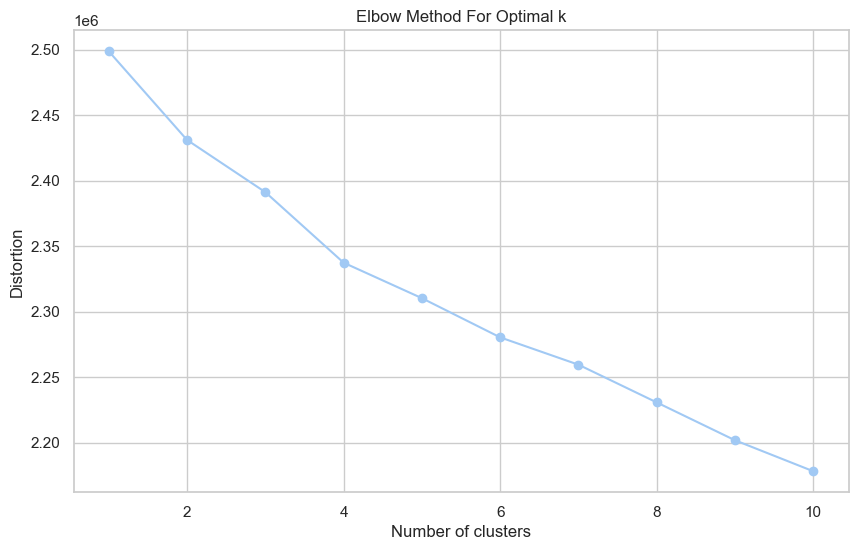

In [54]:
# Elbow Method
distortions = []
for i in range(1, 11):  
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    km.fit(X_train_scaled)
    distortions.append(km.inertia_)

# Plotting the elbow method
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

From the curve, above, we can spot two potential elbow points, one at 2 and the other at 4. 


**Two Clusters (k=2):** Given that we intend to predict if an individual will earn more than $50,000 annually or not, two clusters might be more intuitive as it could potentially differentiate between those two income categories.

**Four Clusters (k=4):** This choice would imply that there might be more than just two broad categories in the dataset.

Being that the task at hand is binary classification, we will proceed using 2 clusters.

#### K-means Clustering
Clustering the data into two clusters:

In [55]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=2, n_init=10, random_state=42)

#### Predict Clusters for Test Data:

In [56]:
clusters_train = kmeans.predict(X_train_scaled)
clusters_test = kmeans.predict(X_test_scaled)

#### PCA for 2D visualization

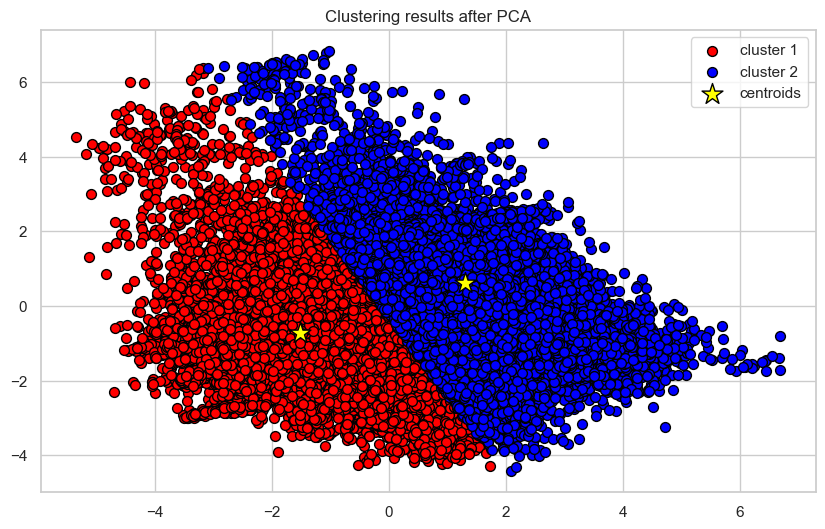

In [57]:
# Reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Train KMeans on PCA data
kmeans_pca = KMeans(n_clusters=2, n_init=10)
kmeans_pca.fit(X_train_pca)

# Predict the clusters for the PCA-transformed training data
clusters_train = kmeans_pca.predict(X_train_pca)

# Plotting
plt.figure(figsize=(10,6))
plt.scatter(X_train_pca[clusters_train == 0, 0], X_train_pca[clusters_train == 0, 1], s=50, c='red', marker='o', edgecolor='black', label='cluster 1')
plt.scatter(X_train_pca[clusters_train == 1, 0], X_train_pca[clusters_train == 1, 1], s=50, c='blue', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=250, c='yellow', marker='*', edgecolor='black', label='centroids')
plt.legend()
plt.grid(True)
plt.title('Clustering results after PCA')
plt.show()

Based on the plot we can observe the following

**Points Close to the Centroids:**

This suggests that the centroids are well-positioned within their respective clusters. It means that KMeans has done a relatively good job in identifying central points that represent the majority of data points in each cluster.

**Some Points are Far Away:**

These distant points could be potential outliers or anomalies. In many datasets, it's common to find points that don't fit neatly into any cluster.

**Overlapping Points:**

Overlapping points indicate that there's some degree of similarity between members of different clusters in the two-dimensional PCA space. However, Just because points overlap in the PCA space doesn't necessarily mean they're similar in the original feature space.

Potential Additional Clusters:

The visual appearance of the data points suggests that there might be more than the two clusters, this appears to be consistent with the elbow curve which suggessted 4 clusters.

#### Evaluate the clusters

In [58]:
print("Train Data Evaluation:")
print(confusion_matrix(y_train, clusters_train))
print(classification_report(y_train, clusters_train))

print("\nTest Data Evaluation:")
print(confusion_matrix(y_test, clusters_test))
print(classification_report(y_test, clusters_test))


Train Data Evaluation:
[[11574  8136]
 [  419  5900]]
              precision    recall  f1-score   support

           0       0.97      0.59      0.73     19710
           1       0.42      0.93      0.58      6319

    accuracy                           0.67     26029
   macro avg       0.69      0.76      0.65     26029
weighted avg       0.83      0.67      0.69     26029


Test Data Evaluation:
[[1773 3215]
 [1345  175]]
              precision    recall  f1-score   support

           0       0.57      0.36      0.44      4988
           1       0.05      0.12      0.07      1520

    accuracy                           0.30      6508
   macro avg       0.31      0.24      0.25      6508
weighted avg       0.45      0.30      0.35      6508



#### Model Review

Clustering is an unsupervised learning model, which means it doesn't "learn" based on a target variable using predictors. Instead, the data is grouped based on inherent similarities without using labels, like the "income" feature, to avoid influencing cluster formation.

By comparing cluster outcomes with "income" labels, we can gauge how well the clusters formed by KMeans align with actual "income" categories. Although this is not a standard metric for evaluating clustering, it offers valuable insights when there is the need to discern the relationship between clusters and labels of the target variable.

A crucial thing to note, however, is that even if the clusters align to a degree with the "income" labels, KMeans wasn't explicitly trying to detect the income classes. It was merely grouping data based on feature similarities. Any alignment between the clusters and the known "income" labels is a post-hoc observation and doesn't necessarily imply that the clustering is "correct" or "useful" for the task. It merely shows a relationship in that specific context.

--
#### Model Performance for Classification Task:

*Overall Accuracy:*
- The model's clustering accuracy for the training dataset stands at 67%, indicating a moderate level of accuracy. However, the performance significantly drops in the test dataset to 30%, suggesting overfitting or issues with generalization.

*Class Specific Performance:*
- Class 0 (income <=50K):
Precision: The model shows high precision of 0.97 in the training set, indicating that when an instance is clustered into the <=50K category, it is usually accurate.
Recall: The lower recall of 0.59 indicates that a considerable number of actual <=50K earners are not correctly clustered.
- Class 1 (income >50K):
Precision: Moderate precision (0.42) in the training set and very low precision (0.05) in the test set indicate inconsistent performance.
Recall: High recall in the training set (0.93) but low in the test set suggests that the model in training is capturing most of the >50K earners but fails to generalize on unseen data.
- F1-Score: The F1-score, which considers the trade-off between precision and recall, varies across the two datasets. For the training set, it appears moderate but drops significantly in the test set, reinforcing concerns about the model's generalization ability.

*Macro vs. Weighted Average:*
- The macro and weighted averages in the training set are decent (0.69 and 0.83 respectively), but they plummet in the test set. This again highlights the discrepancy between the model's performance on the training and test datasets.

--
#### Implications and Strategies:
- Overfitting or Generalization Issues: The performance degradation from training to testing implies overfitting. A more robust validation technique, feature engineering, or regularization may help.
- Unsupervised vs Supervised: Clustering, being unsupervised, operates without the guidance of labels. This can sometimes result in groupings that don't map to expected outcomes, as seen. Instead, a supervised approach using algorithms tailored for binary classification tasks (Logistic Regression, SVM, Decision Trees, etc.) offer better results.


### Clustering with the target variable included

#### Preprocess the data

In [59]:
X = df

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

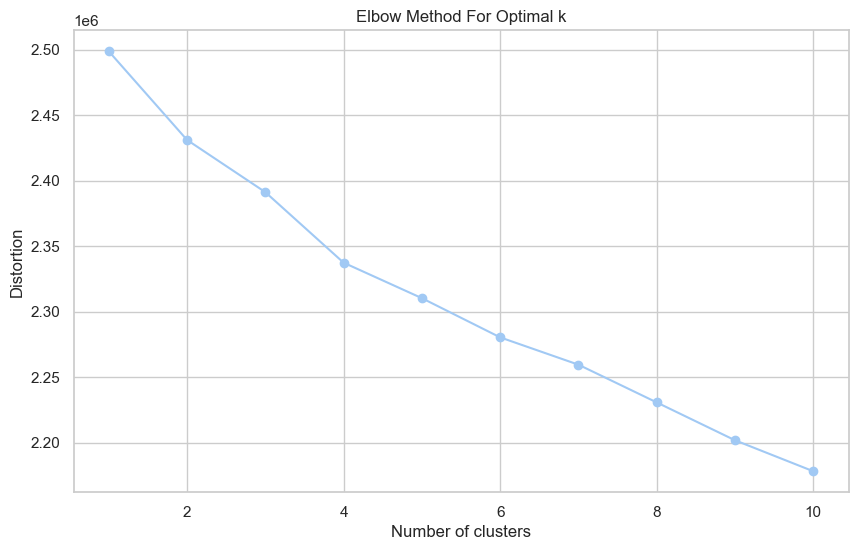

In [60]:
# Elbow Method
distortions = []
for i in range(1, 11):  
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    km.fit(X_train_scaled)
    distortions.append(km.inertia_)

# Plotting the elbow method
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

The elbow curve also indicates the same potential points as the initial curve, but shows a slightly sharper curve at 4.

#### Cluster using KMeans

In [61]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)

#### Predict Clusters for Test Data:

In [62]:
clusters = kmeans.fit_predict(X_scaled)

#### Evaluate the Clusters:
You can now evaluate how well the clusters correspond to the actual labels (income):

In [63]:
# 3. Evaluate how clusters align with the 'income' feature
print(confusion_matrix(X['income'], clusters))
print(classification_report(X['income'], clusters))

[[ 8403 16295]
 [ 7193   646]]
              precision    recall  f1-score   support

           0       0.54      0.34      0.42     24698
           1       0.04      0.08      0.05      7839

    accuracy                           0.28     32537
   macro avg       0.29      0.21      0.23     32537
weighted avg       0.42      0.28      0.33     32537



#### Analysis of Model Performance:

**Confusion Matrix:**
- Of the 24,698 data points with an "income" label of 0, only 8,403 were correctly grouped into cluster 0, and 16,295 were wrongly grouped into cluster 1.
- Of the 7,839 data points with an "income" label of 1, only 646 were correctly grouped into cluster 1, while 7,193 were wrongly grouped into cluster 0.

*Classification Report:*
- Class 0 (income <=50K):
Precision: A precision of 54% suggests that a significant number of instances that are clustered into the <=50K group do not actually belong there.
Recall: A low recall of 34% means that the model misses a large proportion of actual <=50K earners when clustering.
- Class 1 (income >50K):
Precision: Extremely low precision of 4% indicates that very few of the instances clustered in the >50K group actually belong there.
Recall: A low recall of 8% means the model fails to identify most of the actual >50K earners.

*Accuracy:*
- TThe overall accuracy stands at just 28%, which is low. This suggests that the clusters formed by the KMeans algorithm are not a good representation of the actual "income" labels.. However, it should be noted that clustering is not inherently a classification model. The alignment we observe here is a result of including the "income" feature in the clustering, and it's expected that the feature would influence the clusters' formation.

--
#### Considerations
Although not representative of real-world unsupervised learning scenarios where the target labels might be unknown, Here are the exploratory considerations of these results:

- **Understanding Influence:** The inclusion of "income" in the dataset has had a limited effect on improving clustering performance, contrary to initial expectations.

- **Risk of Misleading Results:** The low performance metrics suggest that including the "income" label could give a misleading impression of the model's capabilities.

- **Different Goals:** The low performance metrics may also point to a fundamental mismatch between the goals of clustering and classification. The inclusion of the "income" feature transforms this from a pure clustering problem into a pseudo-classification problem, but it does so ineffectively, as shown by the results.

## NEURAL NETWORK

#### Splitting the Data

In [64]:
X = df.drop("income", axis=1)
y = df["income"]

X = X.astype('float32')
y = y.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Build and Train a Neural Network using TensorFlow/Keras

In [65]:
# Define model structure
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Epoch 1/10
814/814 [==============================] - 5s 5ms/step - loss: 160.7789 - accuracy: 0.6762 - val_loss: 18.0207 - val_accuracy: 0.2336
Epoch 2/10
814/814 [==============================] - 3s 3ms/step - loss: 60.4252 - accuracy: 0.6801 - val_loss: 105.0437 - val_accuracy: 0.7835
Epoch 3/10
814/814 [==============================] - 3s 3ms/step - loss: 24.1563 - accuracy: 0.6797 - val_loss: 3.6375 - val_accuracy: 0.7763
Epoch 4/10
814/814 [==============================] - 3s 3ms/step - loss: 10.5460 - accuracy: 0.6857 - val_loss: 1.5926 - val_accuracy: 0.7872
Epoch 5/10
814/814 [==============================] - 3s 4ms/step - loss: 3.4248 - accuracy: 0.6926 - val_loss: 0.9228 - val_accuracy: 0.7901
Epoch 6/10
814/814 [==============================] - 3s 4ms/step - loss: 1.1004 - accuracy: 0.7188 - val_loss: 0.8083 - val_accuracy: 0.7844
Epoch 7/10
814/814 [==============================] - 3s 4ms/step - loss: 5.1374 - accuracy: 0.7239 - val_loss: 0.8225 - val_accuracy: 0.798

#### Model Evaluation

In [66]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

204/204 [==============================] - 1s 3ms/step - loss: 0.4926 - accuracy: 0.7990
Test Accuracy: 79.90%


#### Training Logs & Evaluation

Test Accuracy: 79.90%

The training logs generated indicate a few points:

High Initial Loss: The loss value starts off extremely high (361.7102) during the first epoch, but then rapidly decreases over the subsequent epochs. This could be due to multiple reasons:

- Large initial weights.
- Learning rate being too high.
- Data not being normalized.
- Validation Accuracy Fluctuations: The validation accuracy oscillates a lot during the training, which suggests the model might be overfitting or the learning rate might be too high, causing the model to jump around in the solution space.

### Model Optimisation

#### Feature Scaling:

In [67]:
# Normalise the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define model structure
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Retrain the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

Epoch 1/10
814/814 [==============================] - 5s 4ms/step - loss: 0.3480 - accuracy: 0.8376 - val_loss: 0.3251 - val_accuracy: 0.8511
Epoch 2/10
814/814 [==============================] - 3s 3ms/step - loss: 0.3144 - accuracy: 0.8535 - val_loss: 0.3211 - val_accuracy: 0.8523
Epoch 3/10
814/814 [==============================] - 3s 3ms/step - loss: 0.3050 - accuracy: 0.8570 - val_loss: 0.3173 - val_accuracy: 0.8556
Epoch 4/10
814/814 [==============================] - 3s 3ms/step - loss: 0.3003 - accuracy: 0.8594 - val_loss: 0.3174 - val_accuracy: 0.8560
Epoch 5/10
814/814 [==============================] - 3s 4ms/step - loss: 0.2956 - accuracy: 0.8624 - val_loss: 0.3210 - val_accuracy: 0.8542
Epoch 6/10
814/814 [==============================] - 3s 4ms/step - loss: 0.2914 - accuracy: 0.8648 - val_loss: 0.3311 - val_accuracy: 0.8528
Epoch 7/10
814/814 [==============================] - 3s 3ms/step - loss: 0.2876 - accuracy: 0.8642 - val_loss: 0.3207 - val_accuracy: 0.8533
Epoch 

The results show that simply scaling the our data has made a significant difference in the model's performance:



- The loss values are now much smaller and in a reasonable range, indicating that the model's predictions are getting closer to the true values.

- The accuracy has improved notably for both the training and validation sets.
The gap between training and validation accuracy has reduced, which is a good indication of reduced overfitting.

#### Some takeaways from the new logs:

- The model starts with an accuracy of 83.76% in the first epoch and reaches 87.08% by the 10th epoch on the training data. This is a clear improvement.

- The validation accuracy also starts at 85.11% and ends at 85.39% in the 10th epoch. It's a positive sign that the validation accuracy is closely following the training accuracy.

- The loss seems to be slightly increasing or plateauing towards the end of the 10 epochs. This may indicate that you're getting close to the point of overfitting or that the model has reached its capacity with the current architecture and data.




#### Adjust Model Architecture:
The current architecture might be too complex for the dataset. Reducing the number of neurons might help. we will also add dropout layers to prevent overfitting.

In [68]:
# Add dropout layers to the model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Retrain the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

Epoch 1/10
814/814 [==============================] - 4s 4ms/step - loss: 0.4325 - accuracy: 0.7918 - val_loss: 0.3494 - val_accuracy: 0.8365
Epoch 2/10
814/814 [==============================] - 3s 3ms/step - loss: 0.3643 - accuracy: 0.8320 - val_loss: 0.3344 - val_accuracy: 0.8443
Epoch 3/10
814/814 [==============================] - 2s 3ms/step - loss: 0.3487 - accuracy: 0.8397 - val_loss: 0.3265 - val_accuracy: 0.8465
Epoch 4/10
814/814 [==============================] - 3s 3ms/step - loss: 0.3369 - accuracy: 0.8473 - val_loss: 0.3248 - val_accuracy: 0.8494
Epoch 5/10
814/814 [==============================] - 3s 3ms/step - loss: 0.3298 - accuracy: 0.8479 - val_loss: 0.3201 - val_accuracy: 0.8520
Epoch 6/10
814/814 [==============================] - 3s 4ms/step - loss: 0.3268 - accuracy: 0.8498 - val_loss: 0.3199 - val_accuracy: 0.8545
Epoch 7/10
814/814 [==============================] - 3s 3ms/step - loss: 0.3254 - accuracy: 0.8490 - val_loss: 0.3210 - val_accuracy: 0.8533
Epoch 

The results show that adjusting the model architecture our data has made a significant difference in the model's performance:


- The loss values are now much smaller and in a reasonable range, indicating that the model's predictions are getting closer to the true values.

- The accuracy has decreased slightly notably for both the training and validation sets.
The gap between training and validation accuracy has reduced, which is a good indication of reduced overfitting.
Some takeaways from the new logs:

- The model starts with an accuracy of 79.18.82% in the first epoch and reaches 85.40% by the 10th epoch on the training data. This is a clear improvement.

- The validation accuracy also starts at 83.65% and ends at 85.40% in the 10th epoch. It's a positive sign that the validation accuracy is closely following the training accuracy.

- The loss seems to be slightly increasing or plateauing towards the end of the 10 epochs. This may indicate that you're getting close to the point of overfitting or that the model has reached its capacity with the current architecture and data.

#### Adjust the learning rate

In [69]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Epoch 1/10
814/814 [==============================] - 5s 4ms/step - loss: 0.3168 - accuracy: 0.8547 - val_loss: 0.3181 - val_accuracy: 0.8560
Epoch 2/10
814/814 [==============================] - 3s 3ms/step - loss: 0.3176 - accuracy: 0.8569 - val_loss: 0.3169 - val_accuracy: 0.8554
Epoch 3/10
814/814 [==============================] - 2s 3ms/step - loss: 0.3149 - accuracy: 0.8549 - val_loss: 0.3172 - val_accuracy: 0.8556
Epoch 4/10
814/814 [==============================] - 2s 3ms/step - loss: 0.3171 - accuracy: 0.8570 - val_loss: 0.3156 - val_accuracy: 0.8559
Epoch 5/10
814/814 [==============================] - 3s 3ms/step - loss: 0.3141 - accuracy: 0.8564 - val_loss: 0.3184 - val_accuracy: 0.8571
Epoch 6/10
814/814 [==============================] - 3s 3ms/step - loss: 0.3136 - accuracy: 0.8580 - val_loss: 0.3159 - val_accuracy: 0.8599
Epoch 7/10
814/814 [==============================] - 3s 3ms/step - loss: 0.3112 - accuracy: 0.8582 - val_loss: 0.3179 - val_accuracy: 0.8554
Epoch 

###  Increase Batch Size and Epochs

In [70]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

Epoch 1/50
407/407 [==============================] - 2s 4ms/step - loss: 0.3068 - accuracy: 0.8611 - val_loss: 0.3194 - val_accuracy: 0.8562
Epoch 2/50
407/407 [==============================] - 2s 4ms/step - loss: 0.3039 - accuracy: 0.8608 - val_loss: 0.3189 - val_accuracy: 0.8560
Epoch 3/50
407/407 [==============================] - 2s 4ms/step - loss: 0.3067 - accuracy: 0.8601 - val_loss: 0.3195 - val_accuracy: 0.8551
Epoch 4/50
407/407 [==============================] - 2s 4ms/step - loss: 0.3072 - accuracy: 0.8609 - val_loss: 0.3214 - val_accuracy: 0.8549
Epoch 5/50
407/407 [==============================] - 2s 4ms/step - loss: 0.3059 - accuracy: 0.8630 - val_loss: 0.3188 - val_accuracy: 0.8560
Epoch 6/50
407/407 [==============================] - 1s 4ms/step - loss: 0.3079 - accuracy: 0.8621 - val_loss: 0.3188 - val_accuracy: 0.8557
Epoch 7/50
407/407 [==============================] - 1s 3ms/step - loss: 0.3057 - accuracy: 0.8615 - val_loss: 0.3192 - val_accuracy: 0.8573
Epoch 


After increasing the batch size to 64, the model's convergence seems to be slightly faster, and it seems to stabilize quicker than before. 

#### Observations and considerations:

- Convergence: The model reaches the validation accuracy of 85.62% in the first epoch itself. This is much faster than the previous batch size of 16, where it took several epochs to stabilize around the same accuracy.

- Test Accuracy: The test accuracy of 85% is almost the same as before. This suggests that batch size did not have a significant impact on the final model's performance on the test set.

- Overfitting: The training accuracy keeps increasing while the validation accuracy stays roughly the same and even appears to decrease slightly after some epochs. This suggests that the model might be overfitting to the training data. Regularization techniques like dropout might help.

- Loss Plateau: The validation loss seems to be hitting a plateau around epoch 3 and does not improve significantly after that. To optimise for computational resources are a concern, We will implement early stopping to save time and resources.

### Early stopping

In [71]:
# Create an EarlyStopping object with desired parameters
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Add the EarlyStopping callback to the fit method:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=50, 
                    batch_size=64, 
                    callbacks=[early_stop])
                    
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")


Epoch 1/50
407/407 [==============================] - 2s 4ms/step - loss: 0.2947 - accuracy: 0.8675 - val_loss: 0.3337 - val_accuracy: 0.8549
Epoch 2/50
407/407 [==============================] - 1s 4ms/step - loss: 0.2963 - accuracy: 0.8677 - val_loss: 0.3330 - val_accuracy: 0.8540
Epoch 3/50
407/407 [==============================] - 2s 4ms/step - loss: 0.2951 - accuracy: 0.8671 - val_loss: 0.3319 - val_accuracy: 0.8548
Epoch 4/50
407/407 [==============================] - 2s 4ms/step - loss: 0.2948 - accuracy: 0.8674 - val_loss: 0.3323 - val_accuracy: 0.8540
Epoch 5/50
407/407 [==============================] - 1s 3ms/step - loss: 0.2936 - accuracy: 0.8688 - val_loss: 0.3321 - val_accuracy: 0.8533
Epoch 6/50
407/407 [==============================] - 1s 3ms/step - loss: 0.2952 - accuracy: 0.8671 - val_loss: 0.3337 - val_accuracy: 0.8531
Epoch 7/50
407/407 [==============================] - 1s 3ms/step - loss: 0.2952 - accuracy: 0.8669 - val_loss: 0.3302 - val_accuracy: 0.8528
Epoch 

By implementing early stopping, the model stopped training as soon as the validation loss did not improve for 10 epochs. This helps save training time and often prevents the model from overfitting to the training data.

# OVERALL CONCLUSIONS


Out of all the algorithms tested, Logistic Regression and the optimized Neural Network have shown the most promise in terms of performance and interpretability.

#### Logistic Regression:
Achieved a decent balance of precision and recall, especially for Class 0. Though there are missed opportunities in Class 1, strategies such as resampling and feature engineering can potentially improve this.

#### Optimized Neural Network:
Showed significant improvement post-optimization, indicating that the model can learn underlying patterns when appropriately configured.

#### KMeans clustering:
it's evident that including the target variable ("income") skews the clustering results, making them align more with the income labels. While this could be of interest in some exploratory contexts, it doesn't serve the true purpose of unsupervised clustering.

--

## Business implications
There are potential missed opportunities and resource misallocations in most models, especially regarding high earners (Class 1). There's a clear need to refine the models, focusing on reducing false negatives and false positives for better targeting and improved customer experience.

For future work, considering a balanced dataset, exploring more sophisticated algorithms, or even deep learning architectures, and focusing on feature engineering might yield better results. Given the data and business context, iterative model development and evaluation should be the approach.